<a href="https://colab.research.google.com/github/jurados/NotesPytorch/blob/main/PyTorch_for_Deep_Learning_and_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.youtube.com/watch?v=V_xro1bcAuA&list=PLWKjhJtqVAblStefaz_YOVpDWqcRScc2s&index=5

# 00. PyTorch Fundamentals

In [ ]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print(torch.__version__)

2.2.1+cu121


In [ ]:
!nvidia-smi

Mon May 20 23:38:30 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## Introduction to Tensor

### Creating Tensors
PyTorch tensors are created using `torch.Tensor()`

In [ ]:
# scalar
scalar = torch.tensor(7)
scalar

tensor(7)

In [ ]:
scalar.ndim

0

In [ ]:
# Get tensor back as Python number
scalar.item()

7

In [ ]:
# Vector
vector = torch.tensor([7,7])
vector

tensor([7, 7])

In [ ]:
vector.ndim

1

In [ ]:
vector.shape

torch.Size([2])

In [ ]:
# Matrix
matrix = torch.tensor([[7,8],
                      [9,10]])
matrix

tensor([[ 7,  8],
        [ 9, 10]])

In [ ]:
matrix.ndim

2

In [ ]:
matrix[1]

tensor([ 9, 10])

In [ ]:
matrix.shape

torch.Size([2, 2])

In [ ]:
# Tensor
tensor = torch.tensor([[[1,2,3],
                        [3,6,9],
                        [2,4,5]]])
tensor

tensor([[[1, 2, 3],
         [3, 6, 9],
         [2, 4, 5]]])

In [ ]:
tensor.ndim

3

In [ ]:
tensor.shape

torch.Size([1, 3, 3])

In [ ]:
tensor[0]

tensor([[1, 2, 3],
        [3, 6, 9],
        [2, 4, 5]])

### Random Tensors

In [ ]:
# Create a random tensors of shape (3,4)
random_tensor = torch.rand(3,4)
random_tensor

tensor([[0.9218, 0.4916, 0.6959, 0.5307],
        [0.3657, 0.0854, 0.4761, 0.6134],
        [0.1727, 0.3092, 0.8992, 0.0638]])

In [ ]:
random_tensor.ndim

2

In [ ]:
random_image_size_tensor = torch.rand(size=(224,224,3)) # height, width, color channel
random_image_size_tensor.shape, random_image_size_tensor.ndim

(torch.Size([224, 224, 3]), 3)

### Zeros and Ones

In [ ]:
# Create a tensor of all zeros
zeros = torch.zeros(size=(3,4))
zeros

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [ ]:
# Create a tensor of all ones
ones = torch.ones(size=(3,4))
ones

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [ ]:
ones.dtype

torch.float32

### Creating a range of tensors and tensors-like

In [ ]:
# Use torch.range()
one_to_ten = torch.arange(start=1,end=11,step=1)
one_to_ten

tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [ ]:
ten_zeros = torch.zeros_like(input=one_to_ten)
ten_zeros

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Tensor DataTypes

Tensor datatypes is one of the 3 big errors you'll run into with PyTorch & deep learning.

1. Tensors not right datatype
2. Tensors not right shape
3. Tensors not on the right service

In [ ]:
# Float 32 tensor
float_32_tensor = torch.tensor([3.0, 6.0, 9.0],
                               dtype=torch.float32, #Datatype is the tensor (e.g. float32 or float16)
                               device=None, # What device is your tensor on
                               requires_grad=False) # Whether or not to track gradients with this tensors operations
float_32_tensor

tensor([3., 6., 9.])

In [ ]:
float_32_tensor.dtype

torch.float32

In [ ]:
# Float 32 tensor
float_16_tensor = float_32_tensor.type(torch.float16)
float_16_tensor

tensor([3., 6., 9.], dtype=torch.float16)

In [ ]:
float_16_tensor * float_32_tensor

tensor([ 9., 36., 81.])

In [ ]:
int_32_tensor = torch.tensor([3, 6, 8], dtype=torch.int32)
int_32_tensor

tensor([3, 6, 8], dtype=torch.int32)

In [ ]:
float_32_tensor * int_32_tensor

tensor([ 9., 36., 72.])

### Getting information from tensors

Tensor datatypes is one of the 3 big errors you'll run into with PyTorch & deep learning.

1. Tensors not right datatype - to get datatype from a tensor, can use `tesnor.dtype`
2. Tensors not right shape - to get a shape from a ternsonr, can use `tensor.shape`
3. Tensors not on the right service - to get device from a tensor, can use `tensor.device`

In [ ]:
# Create a tensor
some_tensor = torch.rand(3,4)
some_tensor

tensor([[0.3757, 0.3548, 0.5808, 0.8790],
        [0.6328, 0.7861, 0.0384, 0.2137],
        [0.7923, 0.5000, 0.1851, 0.2128]])

In [ ]:
some_tensor.size(), some_tensor.shape

(torch.Size([3, 4]), torch.Size([3, 4]))

In [ ]:
# Find out details about some tensor
print(some_tensor)
print(f"Datatype of tensor: {some_tensor.dtype}")
print(f"Shape of tensor: {some_tensor.size()}")
print(f"Device tensor is on: {some_tensor.device}")

tensor([[0.3757, 0.3548, 0.5808, 0.8790],
        [0.6328, 0.7861, 0.0384, 0.2137],
        [0.7923, 0.5000, 0.1851, 0.2128]])
Datatype of tensor: torch.float32
Shape of tensor: torch.Size([3, 4])
Device tensor is on: cpu


### Manipulating Tensors (tensor operations)

Tensor operations include:
- Addition
- Substraction
- Multiplication (element-wise)
- Division
- Matrix multiplication

In [ ]:
# Create a tensor
tensor = torch.tensor([1,2,3])

In [ ]:
print(tensor + 10) # Addition
print(tensor * 10) # Multiplication
print(tensor - 10) # Substraction

# Try oyt PyTorch in-built functions
print()
print(torch.mul(tensor,10))
print(torch.add(tensor,10))

tensor([11, 12, 13])
tensor([10, 20, 30])
tensor([-9, -8, -7])

tensor([10, 20, 30])
tensor([11, 12, 13])


### Matrix multiplication

Two main ways of performing multiplication in neural networks and deep learning:

1. Element-wise multiplication
2. Matrix multiplication (dot product)

In [ ]:
# Element wise multiplication
tensor = torch.tensor([1,2,3])

print(tensor, '*', tensor)
print(f'Equals: {tensor * tensor}')
print(f'Equals: {torch.mul(tensor,tensor)}')

tensor([1, 2, 3]) * tensor([1, 2, 3])
Equals: tensor([1, 4, 9])
Equals: tensor([1, 4, 9])


In [ ]:
# Matrix multiplication
print(tensor, 'dot', tensor)
torch.matmul(tensor, tensor)

tensor([1, 2, 3]) dot tensor([1, 2, 3])


tensor(14)

In [ ]:
%%time
value = 0
for i in range(len(tensor)):
  value += tensor[i] * tensor[i]
value

CPU times: user 1.92 ms, sys: 0 ns, total: 1.92 ms
Wall time: 3.16 ms


tensor(14)

In [ ]:
%%time
torch.matmul(tensor, tensor)

CPU times: user 258 µs, sys: 984 µs, total: 1.24 ms
Wall time: 2.31 ms


tensor(14)

### Matrix multiplication

Two main ways of performing multiplication in neural networks and deep learning:

1. Element-wise multiplication
2. Matrix multiplication (dot product)

There are two main rules that performing matrix multiplication needs to satisfy:

1. THe **inner dimension** must match:
  - `(3,2) @ (3,2)` wont work
  - `(2,3) @ (3,2)` will work
  - `(3,2) @ (2,3)` will work

2. The resulting matrix has the shape of the **outer dimension**
  - `(2,3) @ (3,2) -> (2,2)`
  - `(3,2) @ (2,3) -> (3,3)`

In [ ]:
torch.matmul(torch.rand(3,2), torch.rand(3,2))

RuntimeError: mat1 and mat2 shapes cannot be multiplied (3x2 and 3x2)

In [ ]:
torch.matmul(torch.rand(2,3), torch.rand(3,2))

tensor([[0.7149, 1.1234],
        [0.9099, 1.2874]])

### One of the most common errors in deep learning: shape errors

In [ ]:
# Shapes for matrix multiplication

tensor_A = torch.tensor([[1,2],
                         [3,4],
                         [5,6]])

tensor_B = torch.tensor([[7,10],
                         [8,11],
                         [9,12]])

torch.mm(tensor_A, tensor_B) # torch.mm is the same as torch.matmul (it's an alias for writing less code)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (3x2 and 3x2)

In [ ]:
tensor_A.shape, tensor_B.shape

(torch.Size([3, 2]), torch.Size([3, 2]))

To fix our tensor shape issues, we can manipulate the shape of one of our tensor using a **transpose**.

A **transpose** switches the axes or dimensions of a given tensor.

In [ ]:
tensor_B.T, tensor_B

(tensor([[ 7,  8,  9],
         [10, 11, 12]]),
 tensor([[ 7, 10],
         [ 8, 11],
         [ 9, 12]]))

In [ ]:
# The matrix multiplication operation works when tensor_B is transposed

print(f"Original shapes: tensor_A = {tensor_A.shape}, tensor_B = {tensor_B.shape}")
print(f"New shapes: tensor_A = {tensor_A.shape} same shape as above, tensor_B.T = {tensor_B.T.shape}")
print(f"Multiplying: {tensor_A.shape} @ {tensor_B.T.shape} <- inner dimensions must match")
print(f"Output:\n")
output = torch.mm(tensor_A, tensor_B.T)
print(output)
print(f"\nOutput shape: {output.shape}")

Original shapes: tensor_A = torch.Size([3, 2]), tensor_B = torch.Size([3, 2])
New shapes: tensor_A = torch.Size([3, 2]) same shape as above, tensor_B.T = torch.Size([2, 3])
Multiplying: torch.Size([3, 2]) @ torch.Size([2, 3]) <- inner dimensions must match
Output:

tensor([[ 27,  30,  33],
        [ 61,  68,  75],
        [ 95, 106, 117]])

Output shape: torch.Size([3, 3])


## Finding the min, max, mean, sum, etc. (tensor aggregation)

In [ ]:
# Create a tensor
x = torch.arange(1,100,10)
x

tensor([ 1, 11, 21, 31, 41, 51, 61, 71, 81, 91])

In [ ]:
# Find the min
torch.min(x), x.min()

(tensor(0), tensor(0))

In [ ]:
# Find the max
torch.max(x), x.max()

(tensor(90), tensor(90))

In [ ]:
# Find the mean
# Nothe: the torch.mean() function requires a tensor of float32 datatype to work
torch.mean(x.type(torch.float32)), x.type(torch.float32).mean()

(tensor(45.), tensor(45.))

In [ ]:
# Find the sum
torch.sum(x), x.sum()

(tensor(450), tensor(450))

## Finding the positional min and max

In [ ]:
x = torch.arange(1,100,10)
x

tensor([ 1, 11, 21, 31, 41, 51, 61, 71, 81, 91])

In [ ]:
# Find the position in tensor that has the minimum value with argmin()
# argmin() -> returns index position of target tensor where the minimum value occurs
x.argmin()

tensor(0)

In [ ]:
x[0]

tensor(1)

In [ ]:
# Find the position in tensor that has the minimum value with argmax()
# argmmax() -> returns index position of target tensor where the maximum value occurs
x.argmax()

tensor(9)

In [ ]:
x[9]

tensor(91)

## Reshaping, stacking, squeezing and unsqueezing tensors

- Reshaping - reshapes an input tensor to a defined shape
- View - returns a view of an input tensor of certain shape but keep the same memory as the original tensor.
- Stacking - combines multiple tensors on top of each other (vstack) or side-by-side (hstack).
- Squeeze - removes all `1` dimensions from a tensor.
- Unsqueeze - adds a `1`dimension to a target tensor.
- Permute - return a view of the input with dimensions permuted (swapped) in a certain way.

In [ ]:
# Let's create a tensor
import torch
x = torch.arange(1.,10.)
x, x.shape

(tensor([1., 2., 3., 4., 5., 6., 7., 8., 9.]), torch.Size([9]))

In [ ]:
# Add an extra dimension
x_reshaped = x.reshape(1,9)
x_reshaped, x_reshaped.shape

(tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.]]), torch.Size([1, 9]))

In [ ]:
# Change the view
z = x.view(1,9)
z, z.shape

(tensor([[1., 2., 3., 4., 5., 6., 7., 8., 9.]]), torch.Size([1, 9]))

In [ ]:
# Changing z changes x (because a view of a tensor shares the same memory as the original input)
z[:,0] = 5
z, x

(tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.]]),
 tensor([5., 2., 3., 4., 5., 6., 7., 8., 9.]))

In [ ]:
# Stack tensors on top of each other
x_stacked = torch.stack([x,x,x,x], dim = 0) # dim=0 -> stack vertically, dim=1 -> stack horizontally
print('Stacked with dim = 0 : \n', x_stacked)
x_stacked = torch.stack([x,x,x,x], dim = 1)
print('Stacked with dim = 1 : \n', x_stacked)

Stacked with dim = 0 : 
 tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.],
        [5., 2., 3., 4., 5., 6., 7., 8., 9.],
        [5., 2., 3., 4., 5., 6., 7., 8., 9.],
        [5., 2., 3., 4., 5., 6., 7., 8., 9.]])
Stacked with dim = 1 : 
 tensor([[5., 5., 5., 5.],
        [2., 2., 2., 2.],
        [3., 3., 3., 3.],
        [4., 4., 4., 4.],
        [5., 5., 5., 5.],
        [6., 6., 6., 6.],
        [7., 7., 7., 7.],
        [8., 8., 8., 8.],
        [9., 9., 9., 9.]])


In [ ]:
# torch.squeeze() - removes all singles dimensions from a target tensor
print(f'Previous tensor: {x_reshaped}')
print(f'Previous shape: {x_reshaped.shape}')

# Remove extra dimension from x_reshaped
x_squeezed = x_reshaped.squeeze()
print(f'\nNew tensor: {x_squeezed}')
print(f'New shape: {x_squeezed.shape}')

Previous tensor: tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.]])
Previous shape: torch.Size([1, 9])

New tensor: tensor([5., 2., 3., 4., 5., 6., 7., 8., 9.])
New shape: torch.Size([9])


In [ ]:
# torch.unsqueeze() - adds a single dimension to a target tensor at a specific dim
print(f'Previous tensor: {x_squeezed}')
print(f'Previous shape: {x_squeezed.shape}')

# Add an extra dimension with unsqueeze
x_unsqueezed = x_squeezed.unsqueeze(dim=0) # dim=0 -> zero dimention position, dim=1 -> first dimention position
print(f'\nNew tensor: {x_unsqueezed}')
print(f'New shape: {x_unsqueezed.shape}')

Previous tensor: tensor([5., 2., 3., 4., 5., 6., 7., 8., 9.])
Previous shape: torch.Size([9])

New tensor: tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.]])
New shape: torch.Size([1, 9])


In [ ]:
# torch.permute - rearranges the dimensions of a target tensor in a specified order
x_original = torch.rand(size=(224,224,3)) # [height, width, color_channels]

# Permute the original tensor to rearrange the axis (or dim) order
x_permuted = x_original.permute(2, 0 , 1) # Shifts axis 0->1, 1->2, 2->0

print(f'Previuos shape: {x_original.shape}')
print(f'New shape: {x_permuted.shape}') # [color_channels, height, width]

Previuos shape: torch.Size([224, 224, 3])
New shape: torch.Size([3, 224, 224])


In [ ]:
x_original[0,0,0] = 728218
x_original[0,0,0], x_permuted[0,0,0],

(tensor(728218.), tensor(728218.))

## Indexing (selecting  data from tensors)

Indexing with PyTorch is similar to indexing with NumPy.

In [ ]:
# Create a tensor
import torch
x = torch.arange(1,10).reshape(1,3,3)
x, x.shape

(tensor([[[1, 2, 3],
          [4, 5, 6],
          [7, 8, 9]]]),
 torch.Size([1, 3, 3]))

In [ ]:
# Let's index on our new tensor
x[0]

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [ ]:
#Let's index on the middle bracket (dim=1)
x[0][0]

tensor([1, 2, 3])

In [ ]:
# Let's index on the most inner bracket (last dimension)
x[0][0][0]

tensor(1)

In [ ]:
# You can also use ":" to select "all" of a target dimension
x[:,0]

tensor([[1, 2, 3]])

In [ ]:
# Get all values of the 0th and 1st dimensions but only index 1 of 2nd dimension
x[:,:,1]

tensor([[2, 5, 8]])

In [ ]:
# Get all values of the 0th dimension but only the 1 index values of the 1st and 2nd dimensions
x[:,1,1]

tensor([5])

In [ ]:
# Index on x to return 9
print(x[0][2][2])

# Index on x to return 3, 6, 9
print(x[:,:,2])

tensor(9)
tensor([[3, 6, 9]])


## PyTorch tensors & NumPy

- Data in NumPy, want in PyTorch tensor -> `torch.from_numpy(ndarray)`
- PyTorch tensor -> NumPy -> `torch.Tensor.numpy()`

In [ ]:
import torch
import numpy as np

array = np.arange(1.0,8.0)
tensor = torch.from_numpy(array).type(torch.float32)
# warning: when converting from numpy -> pytorch, pytorch reflects numpy's default
# datatype of float64 unless specified otherwise
array, tensor

(array([1., 2., 3., 4., 5., 6., 7.]), tensor([1., 2., 3., 4., 5., 6., 7.]))

In [ ]:
array.dtype

dtype('float64')

In [ ]:
# Change the value of array
array = array + 1
array, tensor

(array([2., 3., 4., 5., 6., 7., 8.]), tensor([1., 2., 3., 4., 5., 6., 7.]))

In [ ]:
# Tensor to NumPy array
tensor = torch.ones(7)
numpy_tensor = tensor.numpy()
tensor, numpy_tensor

(tensor([1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1.], dtype=float32))

In [ ]:
numpy_tensor.dtype

dtype('float32')

In [ ]:
# Change the tensor
tensor = tensor + 1
tensor, numpy_tensor

(tensor([2., 2., 2., 2., 2., 2., 2.]),
 array([1., 1., 1., 1., 1., 1., 1.], dtype=float32))

## Reproducibility (trying to take random out of random)

In short how a neural network learns:

`star with a random numbers -> tensor operations -> update random numbers to try and make them better representations of the data -> again -> again -> again ...`

To reduce the randomness in neural networks and PyTorch comes the concept of a **random seeds**.

Essentially with the random seeds does is "flavour" the randomness.

In [ ]:
import torch

# Create two random tensors
random_tensor_A = torch.rand(3,4)
random_tensor_B = torch.rand(3,4)

print(random_tensor_A)
print(random_tensor_B)
print(random_tensor_A == random_tensor_B)

tensor([[0.0708, 0.0723, 0.8787, 0.3921],
        [0.1496, 0.3945, 0.2311, 0.0212],
        [0.4543, 0.3456, 0.9723, 0.9302]])
tensor([[0.5060, 0.2199, 0.8970, 0.6307],
        [0.4803, 0.4596, 0.4078, 0.1740],
        [0.0925, 0.6427, 0.4527, 0.5432]])
tensor([[False, False, False, False],
        [False, False, False, False],
        [False, False, False, False]])


In [ ]:
# Let's make some random but reproducible tensors
import torch

# Set the random seed
RANDOM_SEED = 42

torch.manual_seed(RANDOM_SEED) # Only works for one random tensor
random_tensor_C = torch.rand(3,4)

torch.manual_seed(RANDOM_SEED)
random_tensor_D = torch.rand(3,4)

print(random_tensor_C)
print(random_tensor_D)
print(random_tensor_C == random_tensor_D)

tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])
tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])
tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])


## Running tensors and PyTorch objects on the GPUs (and making faster comptations)

GPUs = faster computation on numbers, thanks to CUDA + NVIDIA hardware + PyTorch working behind the scenes to make everything hunky dory (good).


### 1. Getting a GPU

1. Easiest - Use Google Colab for a free GPU.
2. Use your own GPU - takes a little bit of setup and requires the investment of purchasing a GPU, there's a lot of options.
3. Use cloud computing - GCP, AWS, Azure, these services allow you to rent computers on the cloud and access them.

In [ ]:
!nvidia-smi

Wed May 22 14:47:45 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

### 2. Check for GPU access with PyTorch

In [ ]:
# Check for GPU access with PyTorch
import torch
torch.cuda.is_available()

True

In [ ]:
# Setup device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [ ]:
# Count number of devices
torch.cuda.device_count()

1

## 3. Putting tensors (and models) on the GPUs

The reasons we want our tensors/models on the GPUs is because using a GPU results in faster computations.

In [ ]:
# Create a tensor (default on the GPU)
tensor = torch.tensor([1,2,3], device = 'cpu')

# Tensor not on GPU
print(tensor, tensor.device)

tensor([1, 2, 3]) cpu


In [ ]:
# Move tensor to GPU (if available)
tensor_on_gpu = tensor.to(device)
tensor_on_gpu

tensor([1, 2, 3], device='cuda:0')

### 4. Moving tensors back to the CPU

In [ ]:
# If tensor is on GPU, can't transform it to NumPy
tensor_on_gpu.numpy()

TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

In [ ]:
# To fix the GPU tensor with NumPy issue, we can first set it to the GPU
tensor_back_on_cpu = tensor_on_gpu.cpu().numpy()
tensor_back_on_cpu

array([1, 2, 3])

In [ ]:
tensor_on_gpu

tensor([1, 2, 3], device='cuda:0')

# 01. PyTorch workflow

In [ ]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural
                     # networks
import numpy as np
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.3.0+cu121'

## 1. Data (preparing and loading)

Machine Learning is a game of two parts:
1. Get data into a numerical representations.
2. Build a model to learn patterns in that numerical representations.

In [ ]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight*X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
len(X), len(y)

(50, 50)

### Splitting data into training and test sets

In [ ]:
# Create a train/test split

train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [ ]:
X_train, y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

In [ ]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels=y_test,
                     predictions=None):

  plt.figure(figsize=(10,7))

  # plot training data in blue
  plt.scatter(train_data, train_labels, c='b', s=4, label='Training data')

  # plot test data in green
  plt.scatter(test_data, test_labels, c='g', s=4, label='Test data')

  # Are there predictions?
  if predictions is not None:
    plt.scatter(test_data, predictions, c='r', s=4, label='Predictions')

  # Show the legend
  plt.legend(fontsize=14)

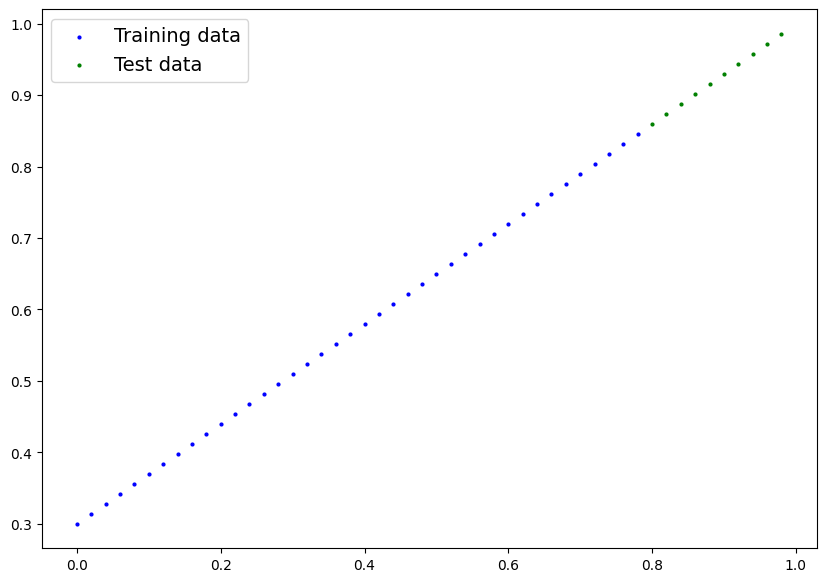

In [ ]:
plot_predictions()

## 2. Build Model

What our model does:

- Start with random values (weight and bias)
- Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weight and bias values we used to created the data)

How does it do so?

Through two main algorithms:

1. Gradient descent
2. Backpropragation

In [ ]:
from torch import nn
# Create a linear regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, # <- start with a random weight and try to adjust it to the ideal weight
                                            requires_grad=True, # <- can this parameter be updated via grandient descent?
                                            dtype=torch.float)) # <- PyTorch loves the datatype torch.float32
    self.bias = nn.Parameter(torch.randn(1, # <- start with a random weight and try to adjust it to the ideal weight
                                            requires_grad=True, # <- can this parameter be updated via grandient descent?
                                            dtype=torch.float)) # <- PyTorch loves the datatype torch.float32

  # Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data
    return self.weights * x + self.bias # this is the linear regression formula


### PyTorch model building essentials

- `torch.nn` - contains all of the buildings for computational graphs (a neural network can be considered a computational graph)
- `torch.nn.Parameter` - what parameters should our model try and learn, often a PyTorch layer from `torch.nn` will set these for us.
- `torch.nn.Module` - the base class for all neural network modules, if you subclass it, you should overwrite forward()
- `torch.optim` - this where the optimizers in PyTorch live, they will help with gradient descent.
- `def forward()` - All `nn.Module` subclasesses require you to overwrite `forward()`, this method defines what happens in the forward computation.

### Checking the contents of our PyTorch model

We can check our model parameters or what's inside our model using `.parameters()`.

In [ ]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model
model_0 = LinearRegressionModel()

# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making prediction using `torch.inference_mode()`

To check our model's predictive power, let's see how well it predict `y_test` based on `X_test`.

When we pass data through our model, it's going to run it through the `forward()` method.

In [ ]:
# Make predictions with model
with torch.inference_mode():
  y_preds = model_0(X_test)

# You can also do something similar with torch.no_grad(),
# however, torch.inference_mode() is preferred
#with torch.no_grad():
#  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [ ]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

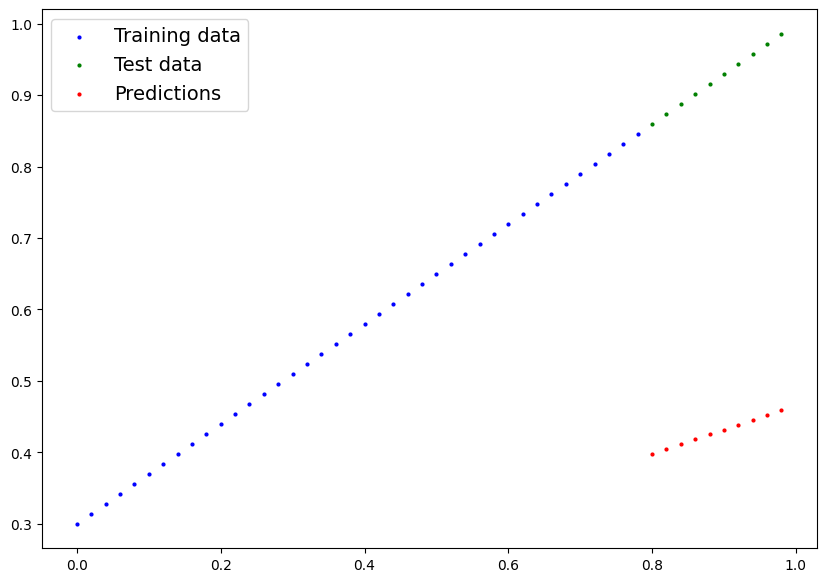

In [ ]:
plot_predictions(predictions=y_preds)

## 3. Train Model

One way to measure how poor or how wrong your models predictions are is to use a loss function.

* Note: Loss function may also be called cost function or criterion in  different areas.

* **Loss Function:** A function to measure how wrong your model's prediction are to the ideal outputs, lower is better.
* **Optimizer:** Takes into account the loss function of a model and adjust the model's parameters (e.g. weight and bias) to improve the loss function.

And specifically for PyTorch, we need:

- A training loop
- A testing loop

In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# Check out our model's parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.01)

### Building a training loop (and a testing loop) in PyTorch

A couple of things we need in a training loop:

1. Loop through the data.
2. Forward pass (this involves data moving through our model's `forward()` functions) to make predictions on data - also called forward propagation.
3. Calculate the loss (compare forward pass predictions to ground truth labels).
4. Optimizer zero grad.
5. Loss backward - move backwards through the network to calculate the gradients of each the parameters of our model with respects to the loss.
6. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss.

In [ ]:
torch.manual_seed(42)

# An epoch is one loop through the data ...
epochs = 100

# Track different values
epoch_count = []
loss_values = []
test_loss_values = []

### Training
# 0. Loop through the data
for epoch in range(epochs):
  # Set the model to training mode
  model_0.train() # train mode in PyTorch sets all parameters that requieres gradients to requiered gradients

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perfrom backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  # 5. Step the optimizer (perform gradient descent)
  optimizer.step() # by default how the optimizer changes will acculumate through the loop so ... we have to zero them above in
                   # step 3 for the next iteration of the loop.

  ### Testing
  model_0.eval() # turns off different settings in the model not needed for evaluation/testing (dropout/batch norm layers)
  with torch.inference_mode(): # turns off gradient tracking and a couple more things behind the scenes
    # 1. Do the forward pass
    test_pred = model_0(X_test)

    # 2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test)

  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

    # Print out model state_dict()
    print(model_0.state_dict())

Epoch: 0 | Loss: 0.0025885067880153656 | Test loss: 0.008447891101241112
OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])
Epoch: 10 | Loss: 0.0025885067880153656 | Test loss: 0.008447891101241112
OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])
Epoch: 20 | Loss: 0.0025885067880153656 | Test loss: 0.008447891101241112
OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])
Epoch: 30 | Loss: 0.0025885067880153656 | Test loss: 0.008447891101241112
OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])
Epoch: 40 | Loss: 0.0025885067880153656 | Test loss: 0.008447891101241112
OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])
Epoch: 50 | Loss: 0.0025885067880153656 | Test loss: 0.008447891101241112
OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])
Epoch: 60 | Loss: 0.0025885067880153656 | Test loss: 0.008447891101241112
OrderedDict([('weights', tensor([0.6990])), (

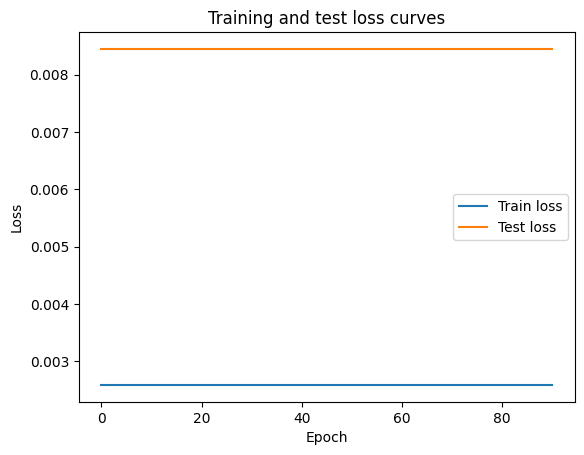

In [ ]:
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label='Train loss')
plt.plot(epoch_count, test_loss_values, label='Test loss')
plt.title('Training and test loss curves')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])

In [ ]:
weight, bias

(0.7, 0.3)

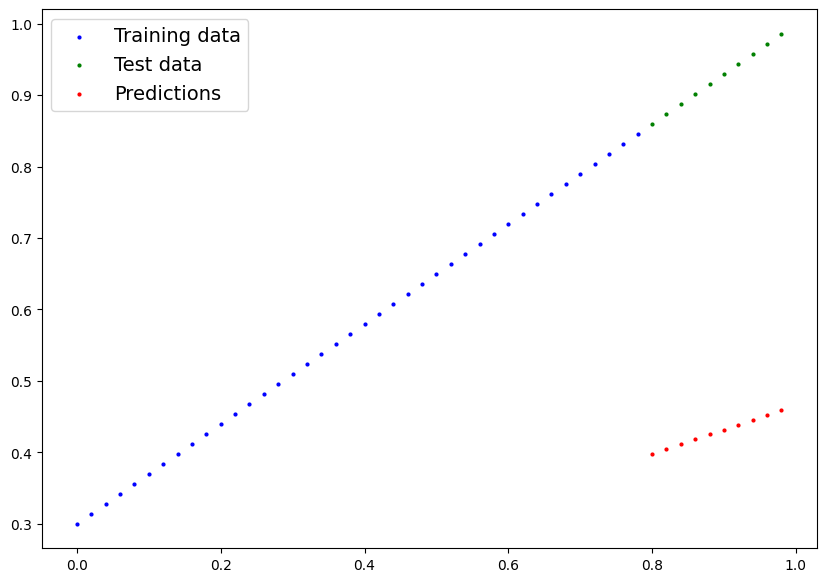

In [ ]:
plot_predictions(predictions=y_preds)

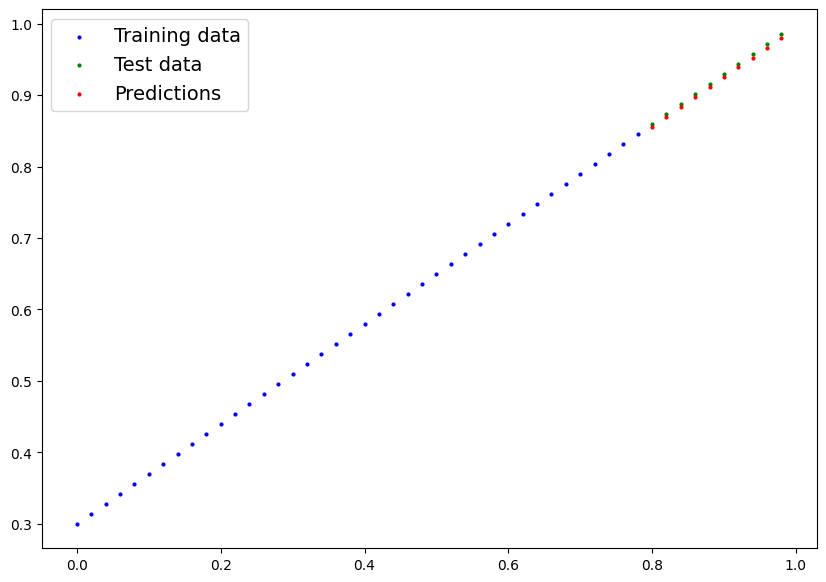

In [ ]:
plot_predictions(predictions=y_preds_new)

## 4. Saving a model in PyTorch

There are three main methods you should about for saving and loading models in PyTorch.

1. `torch.save()` - allows you save a PyTorch object in Python's pickle format.
2. `torch.load()` - allows you load a saved PyTorch objedt.
3. `torch.nn.Module.load_state_dict()` - this allows to load a model's saved state dictionary

In [ ]:
# Saving our PyTorch model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = '01_pytorch_workflow_model_0.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


## 5. Loading a PyTorch model

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])

In [ ]:
# To load in a saved state_dict we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict of model_0
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [ ]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])

In [ ]:
# Make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8554],
        [0.8693],
        [0.8832],
        [0.8971],
        [0.9110],
        [0.9249],
        [0.9388],
        [0.9527],
        [0.9666],
        [0.9805]])

In [ ]:
# Compared loaded model preds with original model preds
y_preds == loaded_model_preds

tensor([[False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False]])

## 6.  Putting in all together

In [ ]:
import torch
from torch import nn

import matplotlib.pyplot as plt

torch.__version__

'2.3.0+cu121'

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using device: {device}')

Using device: cpu


### 6.1 Data

In [ ]:
# Create some data using the linear regression formula
weight = 0.7
bias = 0.3

# Create range values
start = 0
end = 1
step = 0.02

# Create X and y
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

In [ ]:
# Split data
train_split = int(0.8*len(X_train))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

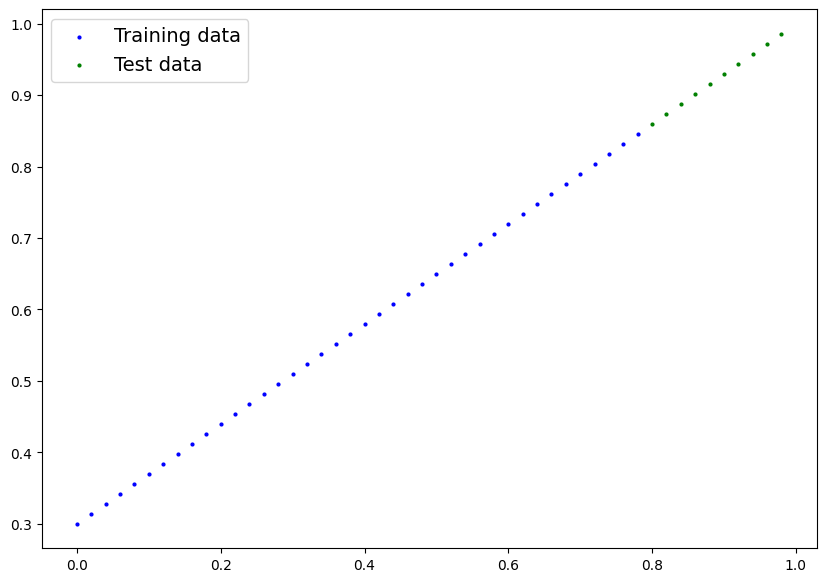

In [ ]:
plot_predictions()

### 6.2 Building a PyTorch model

In [ ]:
# Create a linear model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()

    # Use nn.Linear() for creating the model parameters
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)

  def forward(self,x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

# Set the manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [ ]:
# Check the model current device
next(model_1.parameters()).device

device(type='cpu')

In [ ]:
# Set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cpu')

In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

### 6.3 Training

In [ ]:
# Setup loss function
loss_fn = nn.L1Loss()

# setup our optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)

In [ ]:
# Let's write a training loop
torch.manual_seed(42)

epochs = 200

# Put data on the target device (device agnostic code for data)
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test  = X_test.to(device)
y_test  = y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  # 1. Forward pass
  y_pred = model_1(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ### Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred,y_test)

  # Print out what's happening
  if epoch % 10 == 0:
    print(f'Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}')

Epoch: 0 | Loss: 0.550014853477478 | Test loss: 0.5697731375694275
Epoch: 10 | Loss: 0.440405011177063 | Test loss: 0.444663405418396
Epoch: 20 | Loss: 0.33079516887664795 | Test loss: 0.3195537328720093
Epoch: 30 | Loss: 0.2211853414773941 | Test loss: 0.1944439560174942
Epoch: 40 | Loss: 0.11157549917697906 | Test loss: 0.0693342313170433
Epoch: 50 | Loss: 0.015460771508514881 | Test loss: 0.03690970689058304
Epoch: 60 | Loss: 0.012020175345242023 | Test loss: 0.03583583980798721
Epoch: 70 | Loss: 0.009691683575510979 | Test loss: 0.028384936973452568
Epoch: 80 | Loss: 0.007374221459031105 | Test loss: 0.021721038967370987
Epoch: 90 | Loss: 0.005051673389971256 | Test loss: 0.01427010353654623
Epoch: 100 | Loss: 0.0027588997036218643 | Test loss: 0.006839417852461338
Epoch: 110 | Loss: 0.00694500096142292 | Test loss: 0.0009425050811842084
Epoch: 120 | Loss: 0.00694500096142292 | Test loss: 0.0009425050811842084
Epoch: 130 | Loss: 0.00694500096142292 | Test loss: 0.000942505081184208

In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6877]])),
             ('linear_layer.bias', tensor([0.2969]))])

### 6.4 Making and evaluation predictions

In [ ]:
# Turn model into evaluation mode
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
  y_preds = model_1(X_test)

In [ ]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels=y_test,
                     predictions=None):

  plt.figure(figsize=(10,7))

  # plot training data in blue
  plt.scatter(train_data, train_labels, c='b', s=4, label='Training data')

  # plot test data in green
  plt.scatter(test_data, test_labels, c='g', s=4, label='Test data')

  # Are there predictions?
  if predictions is not None:
    plt.scatter(test_data, predictions, c='r', s=4, label='Predictions')

  # Show the legend
  plt.legend(fontsize=14)

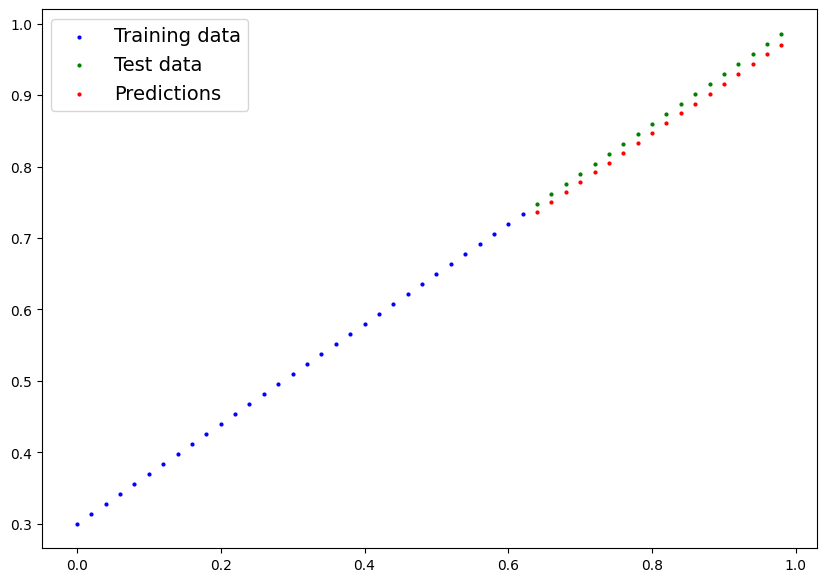

In [ ]:
plot_predictions(predictions=y_preds)

### 6.5 Saving and loading a trained model

In [ ]:
# Saving our PyTorch model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = '01_pytorch_workflow_model_1.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_1.pth


In [ ]:
# To load in a saved state_dict we have to instantiate a new instance of our model class
loaded_model_1 = LinearRegressionModel()

# Load the saved state_dict of model_0
loaded_model_1.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

# 02. PyTorch classification

## 1. Make classification data and get it ready

In [ ]:
import sklearn
from sklearn.datasets import make_circles

In [ ]:
# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise= 0.03,
                    random_state=42)

In [ ]:
print(f"First 5 samples of X: {X[:5]}")
print(f"First 5 samples of y: {y[:5]}")

First 5 samples of X: [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y: [1 1 1 1 0]


In [ ]:
# Make DataFrame of circle data
import pandas as pd
circles = pd.DataFrame({"X1":X[:,0],
                        "X2": X[:,1],
                        "label":y})
circles.head()

X1        X2  label
0  0.754246  0.231481    1.0
1 -0.756159  0.153259    1.0
2 -0.815392  0.173282    1.0
3 -0.393731  0.692883    1.0
4  0.442208 -0.896723    0.0

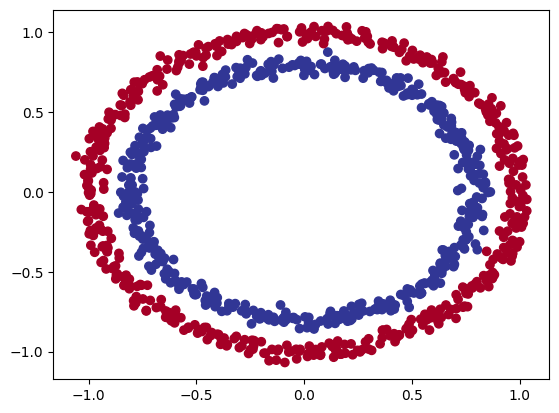

In [ ]:
# Visualize
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu)

### 1.1 Check input and output shapes

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for one sample of X: (2,) and the same for y: ()


### 1.2 Turn data into tensors and create train and test splits

In [ ]:
import torch
torch.__version__

'2.3.0+cu121'

In [ ]:
# Turn data into tensors
X = torch.from_numpy(X).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [ ]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.2, # 0.2 = 20% of data will be test
                                                    random_state=42)

In [ ]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## 2. Building a model

Let's build a model to classify our blue and red dots.

To do so, we want to:

1. Setup device agonistic code so our code will run on an accelerator (GPU) if there is one.
2. Construct a model (by subclassing `nn.Module`).
3. Define a loss function and optimizer.
4. Create a training and test loop.

In [ ]:
# Import PyTorch and nn
import torch
from torch import nn

# Make device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [ ]:
# 1. Construct a model that subclasses nn.Module
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # 2. Create 2 nn.Linear layers capable of handling the shapes of our data
    self.layers_1 = nn.Linear(in_features=2, out_features=5) # takes in 2 features and upscale in 5 features
    self.layers_2 = nn.Linear(in_features=5, out_features=1) # takes in 5 features from previous layer and outputs

    #self.two_linear_layers = nn.Sequential(
    #    nn.Linear(in_features=2, out_features=5),
    #    nn.Linear(in_features=5, out_features=1)
    #).to(device)

  # 3. Define a forward() method that outlines the forward pass
  def forward(self,x):
    return self.layer_2(self.layer_1) # x -> layer_1 -> layer_2 -> output
    # return two_linear_layers(x)

# 4. instantiate an instance of our model class and send it to the target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layers_1): Linear(in_features=2, out_features=5, bias=True)
  (layers_2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [ ]:
# Let's replicate the model above using nn.Sequential
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.3101,  0.6546],
                      [-0.3405,  0.6956],
                      [ 0.4807, -0.6152],
                      [ 0.2634,  0.3427],
                      [ 0.3557,  0.5150]], device='cuda:0')),
             ('0.bias',
              tensor([ 0.4762,  0.1792, -0.0500,  0.6544,  0.2453], device='cuda:0')),
             ('1.weight',
              tensor([[-0.2979,  0.0491, -0.3509,  0.3569, -0.1732]], device='cuda:0')),
             ('1.bias', tensor([-0.2515], device='cuda:0'))])

In [ ]:
# Make predictions
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shpape: {untrained_preds.shape}")
print(f"Length of test samples: {len(X_test)}, Shpape: {X_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 labels:\n{y_test[:10]}")

Length of predictions: 200, Shpape: torch.Size([200, 1])
Length of test samples: 200, Shpape: torch.Size([200, 2])

First 10 predictions:
tensor([[-0.0237],
        [-0.0951],
        [-0.0312],
        [-0.0207],
        [-0.3402],
        [-0.3814],
        [-0.3375],
        [-0.4053],
        [-0.0182],
        [-0.1033]], device='cuda:0')

First 10 labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


### 2.1 Step loss function and optimizer

For example for regession you might want MAE or MSE (Mean Absolute Error or Mean Squeared Error)

For classification oyout might want binary cross entropy or categorical cross entropy.

And for optimizers, two of the most common and useful are SGD and Adam.

In [ ]:
# Setup the loss function
#loss_fn = nn.BCELoss() # BCELoss = requires inputs to have gone through the sigmoid activation function prior to input to BCELoss
loss_fn = torch.nn.BCEWithLogitsLoss() # BCEWithLogistLoss = sigmoid activation function built-in

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr = 0.1)

In [ ]:
# Calcualte accuracy
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100

  return acc

## 3. Training model

### 3.1 Going from raw logits -> prediction probabilities -> prediction labels

We cant convert these **logits** into **prediction probabilities** by passing them to some kind of activation function.

Then we can convert our model's prediction probabilities to **predcition labels** by either rounding them or taking the `argmax()`

In [ ]:
# View the first 5 ouputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.0237],
        [-0.0951],
        [-0.0312],
        [-0.0207],
        [-0.3402]], device='cuda:0')

In [ ]:
# Use the sigmoid activation function on our model logits to turn them into prediction probabilitiess
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4941],
        [0.4763],
        [0.4922],
        [0.4948],
        [0.4158]], device='cuda:0')

For our prediction probabilities vaulues, we need to perfom a range-style rounding on them:

- `y_pred_probs` >= 0.5, y=1 (class 1)
- `y_pred_probs` < 0.5,  y=0 (class 0)

In [ ]:
# Find the predicted labels
y_preds = torch.round(y_pred_probs)

# In full (logits -< pred probs -> pred labels)
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([0., 0., 0., 0., 0.], device='cuda:0')

### 3.2 Building a training and testing loop

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
epochs = 100

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
  ## Training
  model_0.eval()

  # 1. Forward pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -< pred labels

  # 2. Calculate loss/accuracy
  # loss = loss_fn(torch.sigmoid(y_logits), # nn.BCELoss expects prediction probabilities as input
  #               y_train)
  loss = loss_fn(y_logits, # nn.BCEWithLogitsLoss expect raw logits as input
                 y_train )
  acc  = accuracy_fn(y_true=y_train,
                     y_pred=y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward
  loss.backward

  # 5. optimizer step (gradient descent)
  optimizer.step()

  ### Testing
  model_0.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_0(X_test).squeeze()
    test_pred  = torch.round(torch.sigmoid(test_logits))

    # 2. Calculate test loss/acc
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true = y_test,
                           y_pred = test_pred)

  # Print out what's happening'
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc {acc: .2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.70066, Acc  45.62% | Test loss: 0.69932, Test acc: 46.50%
Epoch: 10 | Loss: 0.70066, Acc  45.62% | Test loss: 0.69932, Test acc: 46.50%
Epoch: 20 | Loss: 0.70066, Acc  45.62% | Test loss: 0.69932, Test acc: 46.50%
Epoch: 30 | Loss: 0.70066, Acc  45.62% | Test loss: 0.69932, Test acc: 46.50%
Epoch: 40 | Loss: 0.70066, Acc  45.62% | Test loss: 0.69932, Test acc: 46.50%
Epoch: 50 | Loss: 0.70066, Acc  45.62% | Test loss: 0.69932, Test acc: 46.50%
Epoch: 60 | Loss: 0.70066, Acc  45.62% | Test loss: 0.69932, Test acc: 46.50%
Epoch: 70 | Loss: 0.70066, Acc  45.62% | Test loss: 0.69932, Test acc: 46.50%
Epoch: 80 | Loss: 0.70066, Acc  45.62% | Test loss: 0.69932, Test acc: 46.50%
Epoch: 90 | Loss: 0.70066, Acc  45.62% | Test loss: 0.69932, Test acc: 46.50%


## 4. Make predictions and evaluate the model

From the metrics it looks like our model isn't learning anything ...

So to inspect it let's make somre predictions and make them visual.

In [ ]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo
if Path("helper_functions.py").is_file():
  print('helper_functions.py already exists, skypping downloading')
else:
  print('Download helper_functions.py')
  request = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py')
  with open("helper_functions.py",'wb') as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

Download helper_functions.py


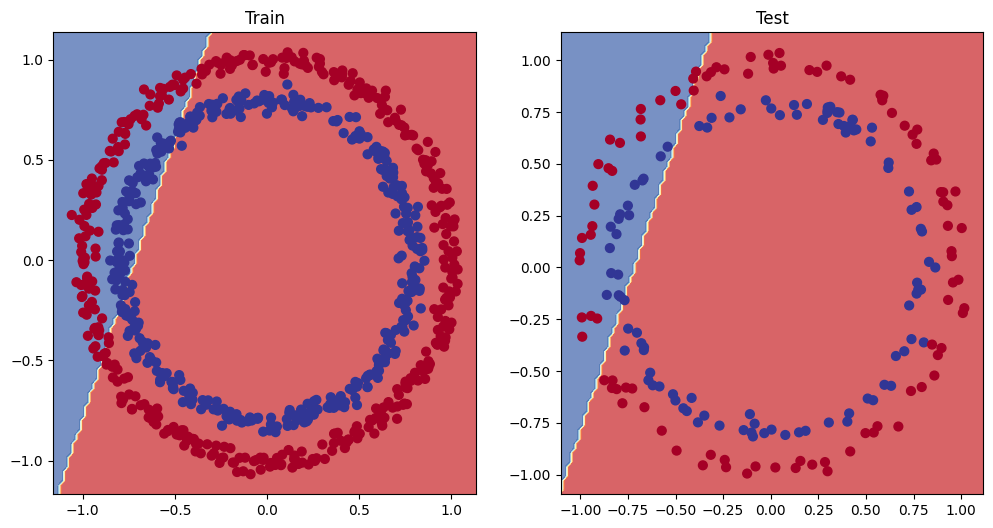

In [ ]:
# Plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model = model_0, X = X_train, y = y_train)

plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model = model_0, X = X_test, y = y_test)

## 5. Improving a model (from a model perpective)

* Add more layers - give the model more chances to learn about patterns in the data
* Add more hidden units - go from 5 hidden units to 10 hidden untis
* Fit for longer
* Changing the activation functions
* Change the learning rate
* Change the loss function

The ooptions are all from a model's perpective because they deal directly with the model, rather than the data.

And because these option are all values we (as machine learning engineers and data scientists) can change, they are referred as **hyperparameters**.

In [ ]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features = 10)
    self.layer_2 = nn.Linear(in_features=10, out_features = 10)
    self.layer_3 = nn.Linear(in_features=10, out_features = 1)

  def forward(self,x):
    z = self.layer_1(x)
    z = self.layer_1(z)
    z = self.layer_1(z)
    return z

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
# Create a loss function
loss_fn = nn.BCEWithLogitsLoss()

# Create an optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr = 0.3)

In [ ]:
# Write a training
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
epochs = 1000

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
  ## Training
  model_1.train()

  # 1. Forward pass
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -< pred labels

  # 2. Calculate loss/accuracy
  loss = loss_fn(y_logits,y_train)
  acc  = accuracy_fn(y_true=y_train,
                     y_pred=y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward
  loss.backward

  # 5. optimizer step (gradient descent)
  optimizer.step()

  ### Testing
  model_1.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_1(X_test).squeeze()
    test_pred  = torch.round(torch.sigmoid(test_logits))

    # 2. Calculate test loss/acc
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true = y_test,
                           y_pred = test_pred)

  # Print out what's happening'
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc {acc: .2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

RuntimeError: mat1 and mat2 shapes cannot be multiplied (800x10 and 2x10)

### 5.1 Preparing data to see if our model can fit a straight line

In [ ]:
# Create some data
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01
X_regression = torch.arange(start,end,step).unsqueeze(dim=1)
y_regression = weight*X_regression + bias

X[:10], y[:10]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967],
         [-0.4796,  0.6764],
         [-0.0136,  0.8033],
         [ 0.7715,  0.1478],
         [-0.1693, -0.7935],
         [-0.1215,  1.0215]]),
 tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0.]))

In [ ]:
# Create train and test splits
train_split = int(0.8*len(X_regression))
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

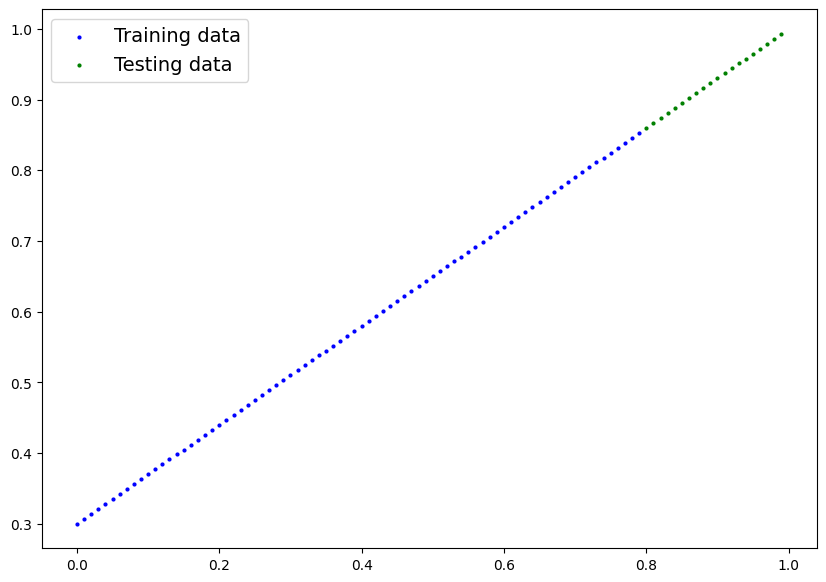

In [ ]:
plot_predictions(train_data=X_train_regression,
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression)

### 5.2 Adjusting `model_1` to fit a straight line

In [ ]:
# Same architecture as model_1 (but usign nn.Squential())
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)
model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
# Loss and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(model_2.parameters(), lr=0.1)

In [ ]:
# Train the model
torch.manual_seed(42)

# Set the number of epochs
epochs = 1000

# Put data on the target device
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

# Training
for epoch in range(epochs):
  y_pred = model_2(X_train_regression)
  loss = loss_fn(y_pred, y_train_regression)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # Testing
  model_2.eval()
  with torch.inference_mode():
    test_pred = model_2(X_test_regression)
    test_loss = loss_fn(test_pred,y_test_regression)

  # Print out what's happening'
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Test loss: {test_loss:.5f}")

Epoch: 0 | Loss: 0.04366 | Test loss: 0.02921
Epoch: 100 | Loss: 0.06049 | Test loss: 0.00662
Epoch: 200 | Loss: 0.05262 | Test loss: 0.01010
Epoch: 300 | Loss: 0.05536 | Test loss: 0.03022
Epoch: 400 | Loss: 0.06032 | Test loss: 0.01390
Epoch: 500 | Loss: 0.06558 | Test loss: 0.01551
Epoch: 600 | Loss: 0.03799 | Test loss: 0.03161
Epoch: 700 | Loss: 0.04120 | Test loss: 0.06371
Epoch: 800 | Loss: 0.06635 | Test loss: 0.00643
Epoch: 900 | Loss: 0.05719 | Test loss: 0.02794


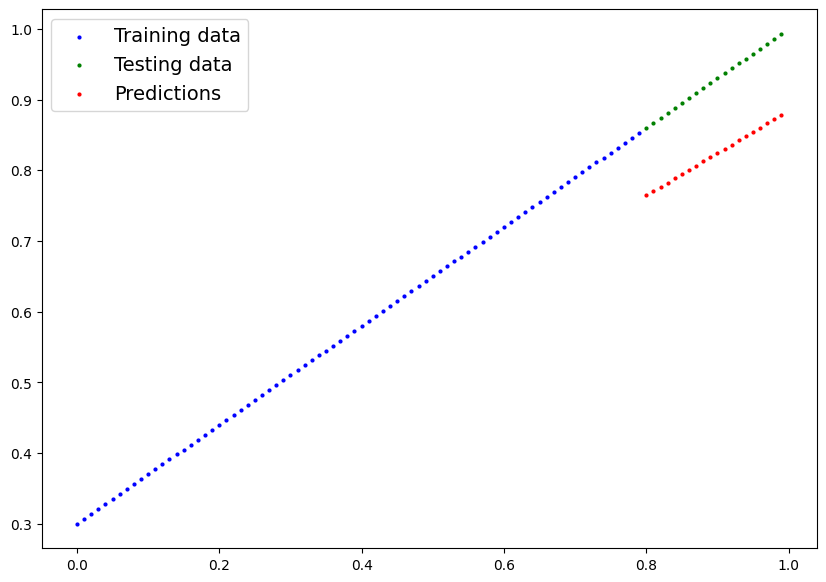

In [ ]:
# Turn on evaluation mode
model_2.eval()

# make predictions (inference)
with torch.inference_mode():
  y_preds = model_2(X_test_regression)

plot_predictions(train_data=X_train_regression.cpu(),
                 train_labels=y_train_regression.cpu(),
                 test_data=X_test_regression.cpu(),
                 test_labels=y_test_regression.cpu(),
                 predictions=y_preds.cpu())

## 6. The missing piece: non-linearity

### 6.1 Recreating non-linear data (red and blue circles)

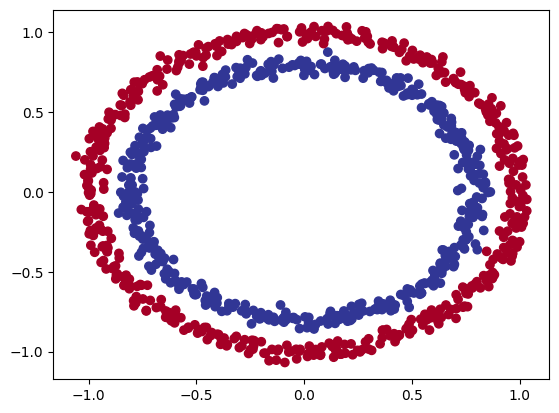

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X,y = make_circles(n_samples, noise = 0.03 , random_state = 42)

plt.scatter(X[:,0] ,X[:,1], c=y, cmap=plt.cm.RdYlBu)

In [ ]:
# Convert data to tensors and then to train and test splits
import torch
from sklearn.model_selection import train_test_split

# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

TypeError: expected np.ndarray (got Tensor)

### 6.2 Building a model with non-linearity

* Linear = straight linear
* Non-linear = non-straight lines

Artificial neural networks are a large combinations of linear (straight) and non-straight (non-linear) functions which are potentially able to find patterns in data.

In [ ]:
# Build a model with non-linear activation functions
from torch import nn
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU() # relu is a non-linear activation function

  def forward(self,x):
    # Where should we pot our non-linear actation functions?
    z = self.layer_1(x)
    z = self.relu(z)
    z = self.layer_2(z)
    z = self.relu(z)
    z = self.layer_3(z)

    return z

model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
# Setuo loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_3.parameters(),
                            lr = 0.3)

### 6.3 Training a model with non-linearity

In [ ]:
# Random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
epochs = 1000
for epoch in range(epochs):
  ## Training
  model_3.train()

  # 1. Forward pass
  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> pred probs -< pred labels

  # 2. Calculate loss/accuracy
  loss = loss_fn(y_logits,y_train)
  acc  = accuracy_fn(y_true=y_train,
                     y_pred=y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward
  loss.backward()

  # 5. optimizer step (gradient descent)
  optimizer.step()

  ### Testing
  model_3.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_3(X_test).squeeze()
    test_pred  = torch.round(torch.sigmoid(test_logits))

    # 2. Calculate test loss/acc
    test_loss = loss_fn(test_logits,y_test)
    test_acc = accuracy_fn(y_true = y_test,y_pred = test_pred)

  # Print out what's happening'
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc {acc: .2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.70306, Acc  50.00% | Test loss: 0.70096, Test acc: 50.00%
Epoch: 100 | Loss: 0.68930, Acc  58.50% | Test loss: 0.68929, Test acc: 59.50%
Epoch: 200 | Loss: 0.68079, Acc  67.38% | Test loss: 0.68286, Test acc: 67.00%
Epoch: 300 | Loss: 0.65082, Acc  75.00% | Test loss: 0.66050, Test acc: 73.50%
Epoch: 400 | Loss: 0.49284, Acc  94.25% | Test loss: 0.52112, Test acc: 91.00%
Epoch: 500 | Loss: 0.41891, Acc  75.88% | Test loss: 0.47375, Test acc: 66.50%
Epoch: 600 | Loss: 0.13276, Acc  99.25% | Test loss: 0.16540, Test acc: 99.00%
Epoch: 700 | Loss: 0.04613, Acc  100.00% | Test loss: 0.07407, Test acc: 99.50%
Epoch: 800 | Loss: 0.02585, Acc  100.00% | Test loss: 0.04690, Test acc: 100.00%
Epoch: 900 | Loss: 0.01741, Acc  100.00% | Test loss: 0.03501, Test acc: 100.00%


### 6.4 Evaluating a model trained with non-linear activation functions

In [ ]:
# Makes predictions
model_3.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10], y_test[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

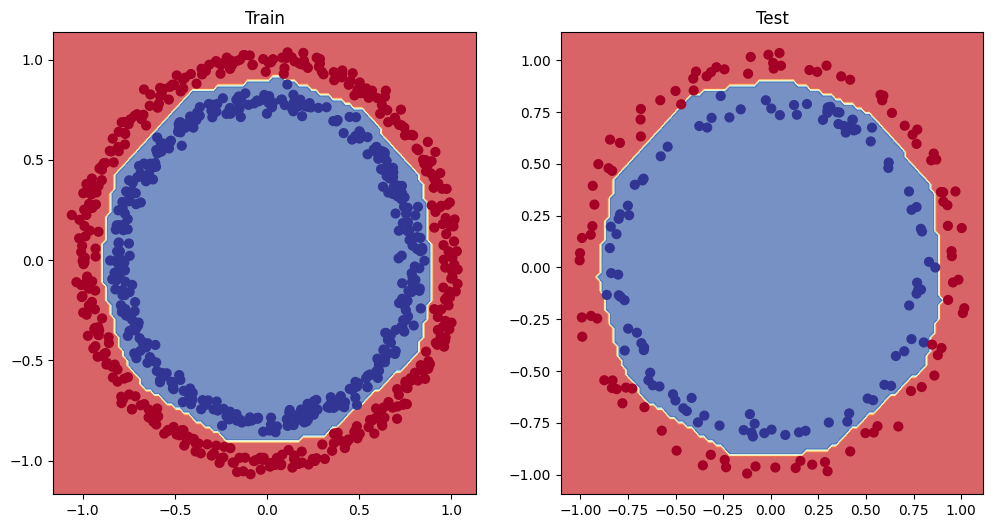

In [ ]:
# Plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model = model_3, X = X_train, y = y_train)

plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model = model_3, X = X_test, y = y_test)

## 8 Pulling it all together with a multi-class classifcation problem
- Binary classification: one thing or another.
- Multi-class classifcation: more than one thing or another.

### 8.1 Creating a toy multi-class dataset

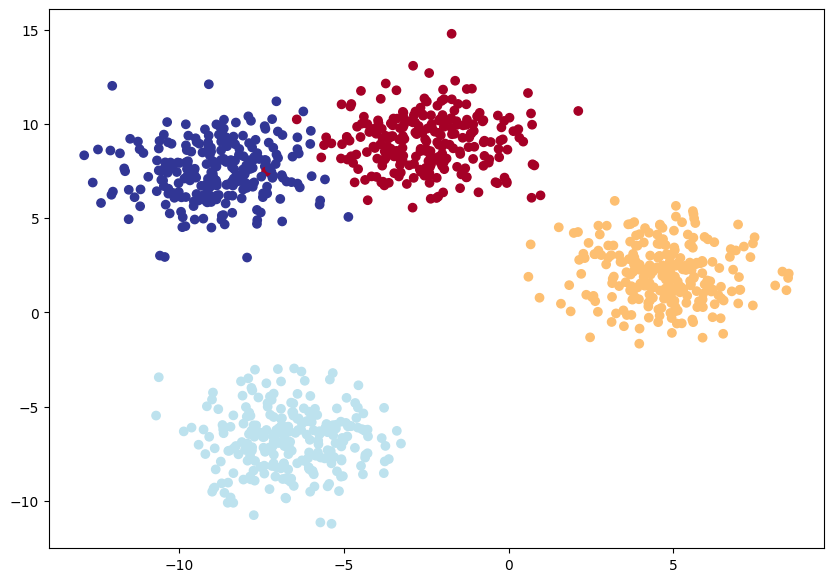

In [ ]:
# Import dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob , y_blob = make_blobs(n_samples=1000,
                             n_features = NUM_FEATURES,
                             centers = NUM_CLASSES,
                             cluster_std=1.5,
                             random_state = RANDOM_SEED)

# 2. Turn data into tensors
X_blobs = torch.from_numpy(X_blob).type(torch.float)
y_blobs = torch.from_numpy(y_blob).type(torch.LongTensor)

# 3. Split into train and test
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,y_blob,
                                                                        test_size=0.2,
                                                                        random_state = RANDOM_SEED)
X_blob_train = torch.from_numpy(X_blob_train).type(torch.float)
y_blob_train = torch.from_numpy(y_blob_train).type(torch.LongTensor)
X_blob_test = torch.from_numpy(X_blob_test).type(torch.float)
y_blob_test = torch.from_numpy(y_blob_test).type(torch.LongTensor)

# 4. Plot data
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:,0], X_blob[:,1], c=y_blob, cmap=plt.cm.RdYlBu)

### 8.2 Building a multi-class classification model in PyTorch

In [ ]:
# Setting device
device = 'cuda' if torch.cuda.is_available() else 'cpu'

from torch import nn
# Build a multi-class classification model
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    """ Initialized multi-class classification model.

    Args:
      input_features (int): Number of input features to the model
      output_features (int): Number of output features (number of output classes)
      hidden_units (int): Number of hidden units between lates, default 8

    Return:

    """
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features=output_features)
    )

  def forward(self, x):
    return self.linear_layer_stack(x)

# Create an instance of BlobModel and send it to the target device
model_4 = BlobModel(input_features=2, output_features=4, hidden_units=8).to(device)
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

### 8.3 Create a loss fuunction and an optimizer for a multi-class classification model

In [ ]:
# Create a loss function for multi-class classification
loss_fn = nn.CrossEntropyLoss()

# Create an optimizer for multi-class classification
optimizer = torch.optim.SGD(params=model_4.parameters(), lr= 0.01)

### 8.4 Getting prediction probabilities for a multi-class PyTorch model

In [ ]:
# Let's get some raw outputs of our model (logits)
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(torch.from_numpy(X_blob_test).type(torch.float32))

y_logits[:10]

tensor([[-1.2549, -0.8112, -1.4795, -0.5696],
        [ 1.7168, -1.2270,  1.7367,  2.1010],
        [ 2.2400,  0.7714,  2.6020,  1.0107],
        [-0.7993, -0.3723, -0.9138, -0.5388],
        [-0.4332, -1.6117, -0.6891,  0.6852],
        [ 2.0878, -1.3728,  2.1248,  2.5052],
        [ 1.8310,  0.8851,  2.1674,  0.6006],
        [ 0.1412, -1.4742, -0.0360,  1.0373],
        [ 2.9426,  0.7047,  3.3670,  1.6184],
        [-0.0645, -1.5006, -0.2666,  0.8940]])

In [ ]:
# Convert our model's logit outputs to prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)
print(torch.sum(y_pred_probs[0]))
print(torch.argmax(y_pred_probs[0]))

tensor(1.)
tensor(3)


In [ ]:
# Convert our model's prediction probabilities to prediction labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds

tensor([3, 3, 2, 1, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2,
        2, 2, 3, 3, 3, 3, 3, 1, 1, 2, 1, 2, 1, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3,
        3, 3, 1, 3, 3, 1, 3, 2, 3, 1, 3, 2, 2, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 3, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 3, 3, 2, 3, 3, 3, 3, 2, 3, 1, 3, 3, 2, 1, 1, 3, 2, 2, 3, 3, 3, 1, 2,
        2, 3, 3, 1, 2, 3, 3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 1, 1, 3, 2, 2,
        2, 2, 3, 3, 3, 2, 2, 1, 3, 2, 3, 3, 3, 3, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3,
        2, 2, 2, 3, 3, 1, 1, 1, 1, 1, 3, 1, 3, 2, 2, 3, 2, 2, 3, 3, 2, 2, 3, 3,
        1, 3, 2, 3, 3, 1, 2, 3])

### 8.5 Creating a training loop and testing loop for a multi-class with PyTorch

In [ ]:
 # Fit the multi-class model to the data
 # Random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100

  return acc

X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

# Build training and evaluation loop
epochs = 1000
for epoch in range(epochs):
  ## Training
  model_4.train()

  y_logits = model_4(X_blob_train).squeeze()
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # logits -> pred probs -< pred labels

  loss = loss_fn(y_logits,y_blob_train)
  acc  = accuracy_fn(y_true=y_blob_train,
                     y_pred=y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  ### Testing
  model_4.eval()
  with torch.inference_mode():
    test_logits = model_4(X_blob_test).squeeze()
    test_pred  = torch.softmax(test_logits, dim=1).argmax(dim=1)

    test_loss = loss_fn(test_logits,y_blob_test)
    test_acc = accuracy_fn(y_true = y_blob_test,y_pred = test_pred)

  # Print out what's happenin'
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc {acc: .2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.03197, Acc  99.12% | Test loss: 0.02317, Test acc: 99.50%
Epoch: 100 | Loss: 0.03102, Acc  99.12% | Test loss: 0.02206, Test acc: 99.50%
Epoch: 200 | Loss: 0.03025, Acc  99.12% | Test loss: 0.02114, Test acc: 99.50%
Epoch: 300 | Loss: 0.02961, Acc  99.12% | Test loss: 0.02037, Test acc: 99.50%
Epoch: 400 | Loss: 0.02908, Acc  99.12% | Test loss: 0.01970, Test acc: 99.50%
Epoch: 500 | Loss: 0.02862, Acc  99.12% | Test loss: 0.01913, Test acc: 99.50%
Epoch: 600 | Loss: 0.02823, Acc  99.12% | Test loss: 0.01862, Test acc: 99.50%
Epoch: 700 | Loss: 0.02789, Acc  99.12% | Test loss: 0.01818, Test acc: 99.50%
Epoch: 800 | Loss: 0.02759, Acc  99.12% | Test loss: 0.01778, Test acc: 99.50%
Epoch: 900 | Loss: 0.02733, Acc  99.12% | Test loss: 0.01742, Test acc: 99.50%


In [ ]:
# Make predictions
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test)
y_logits[:10]

tensor([[  5.4130,  12.9985, -17.8252, -11.7658],
        [  5.8749, -15.1728,   4.2392,  12.7807],
        [ -7.1776, -16.5759,  24.9577,  15.2037],
        [  2.2971,   9.5420, -10.3577,  -8.4628],
        [  9.8867,   4.0317, -17.2943,  -4.3499],
        [  6.5276, -18.8513,   6.2315,  15.9316],
        [ -7.5992, -12.6017,  22.3798,  11.7736],
        [  8.5943,  -1.0393, -11.2587,   0.1948],
        [ -7.2684, -23.1828,  30.4311,  20.9788],
        [  8.9122,   0.8161, -13.2345,  -1.4538]])

In [ ]:
# Go from logits -> Prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)
y_pred_probs[:10]

tensor([[5.0750e-04, 9.9949e-01, 4.1042e-14, 1.7572e-11],
        [1.0007e-03, 7.2348e-13, 1.9496e-04, 9.9880e-01],
        [1.1061e-14, 9.1660e-19, 9.9994e-01, 5.8063e-05],
        [7.1327e-04, 9.9929e-01, 2.2769e-09, 1.5146e-08],
        [9.9714e-01, 2.8573e-03, 1.5638e-12, 6.5445e-07],
        [8.2382e-05, 7.8335e-16, 6.1269e-05, 9.9986e-01],
        [9.5565e-14, 6.4232e-16, 9.9998e-01, 2.4762e-05],
        [9.9971e-01, 6.5475e-05, 2.3869e-09, 2.2492e-04],
        [4.2390e-17, 5.1967e-24, 9.9992e-01, 7.8502e-05],
        [9.9966e-01, 3.0464e-04, 2.4082e-10, 3.1475e-05]])

In [ ]:
# Go from pred probs -> pred labels
y_pred = torch.argmax(y_pred_probs, dim=1)
y_pred[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

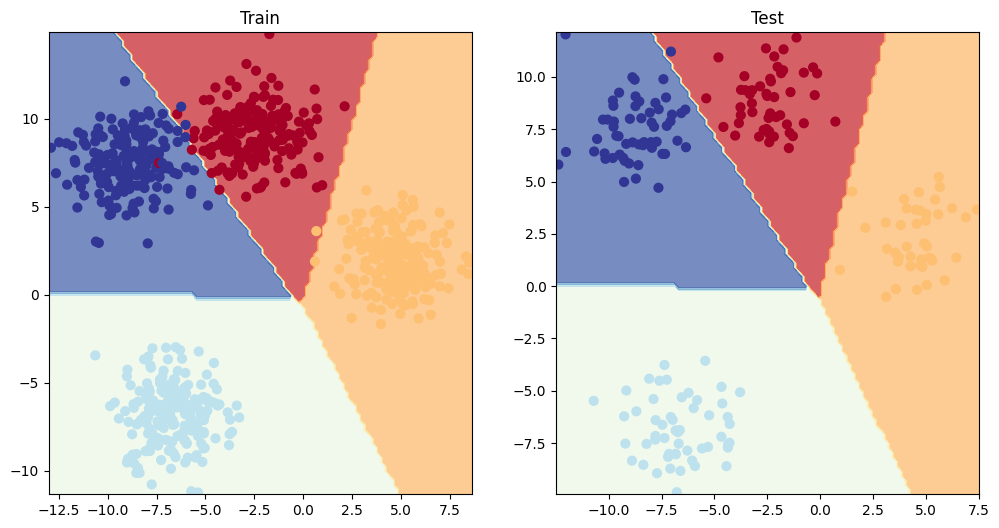

In [ ]:
# Plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model = model_4, X = X_blob_train, y = y_blob_train)

plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model = model_4, X = X_blob_test, y = y_blob_test)

# 0.3 PyTorch Computer Vision


## 0. Computer vision libraries in PyTorch

- `torchvision` - base demain library for PyTorch computer vision
- `torchvision.datasets` - get datasets and data loading functions for computer vision here.
- `torchvision.models` - get pretained computer vision models that you can leverage for your own problems.
- `torchvision.transforms` - function for manipulating your vision data (images) to be suitable for use with an ML model.
- `torch.utils.data.Dataset` - Base dataset class for PyTorch.
- `torch.utils.data.DataLoader` - Creates a Python iterable over a dataset

In [ ]:
# Import PyTorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Import matplotlib
import matplotlib.pyplot as plt

# Check version
print(torch.__version__)
print(torchvision.__version__)

2.3.0+cu121
0.18.0+cu121


## 1. Getting a dataset

In [ ]:
# Setup training data
train_data = datasets.FashionMNIST(
    root='data', # where to download data to?
    train=True, # do we want the training dataset?
    download=True, # do we want to download it?
    transform = ToTensor(),
    target_transform=None
)

test_data = datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

In [ ]:
len(train_data), len(test_data)

(60000, 10000)

In [ ]:
# See the first trainind example
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
class_names = train_data.classes
for idx, name in enumerate(class_names):
  print(idx,name)

0 T-shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot


In [ ]:
# Check the sahpe of our image
print(f"Image shape: {image.shape} -> [color_channels, height, width]")
print(f"Image label: {class_names[label]}")

Image shape: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Image label: Ankle boot


### 1.2 Visualizing our data

Text(0.5, 1.0, 'Ankle boot')

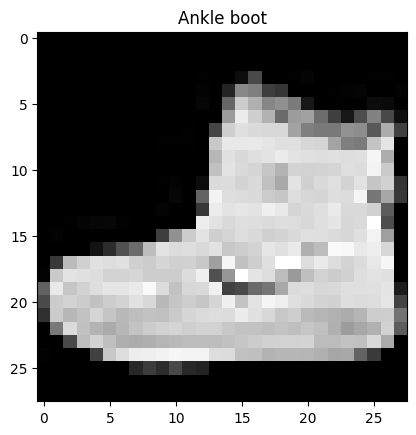

In [ ]:
import matplotlib.pyplot as plt
image, label = train_data[0]

plt.imshow(image.squeeze(), cmap='gray')
plt.title(class_names[label])

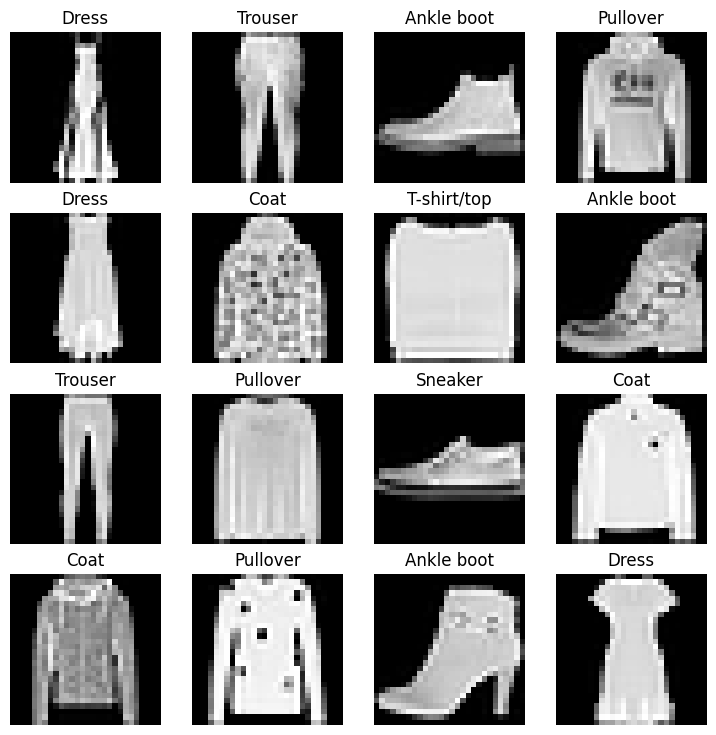

In [ ]:
# Plot more image
torch.manual_seed(46)
fig = plt.figure(figsize=(9,9))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]

  fig.add_subplot(rows,cols,i)
  plt.imshow(img.squeeze(),cmap='gray')
  plt.title(class_names[label])
  plt.axis(False)

## 2. Prepare DataLoader

DataLoader turns our dataset into a Python iterable.

More specifically, we want to turn our data into batches (or mini-batches).

1. It is more computationally efficient, as in, your computing hardware may not be able to look at 60000 images in one hit. So we break it down to 32 images at a time (batch size of 32).
2. It gives our neural network more chances to update its gradient per epoch.

In [ ]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [ ]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparmeter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(dataset=train_data,
                              batch_size = BATCH_SIZE,
                              shuffle=True)
test_dataloader = DataLoader(dataset=test_data,
                              batch_size = BATCH_SIZE,
                              shuffle=True)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x791057b76080>,
 <torch.utils.data.dataloader.DataLoader at 0x791061ef9960>)

In [ ]:
# Let's check out what we've created
print(f"DataLoader: {train_dataloader, test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE} ...")
print(f"Length of train_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE} ...")

DataLoader: (<torch.utils.data.dataloader.DataLoader object at 0x791057b76080>, <torch.utils.data.dataloader.DataLoader object at 0x791061ef9960>)
Length of train_dataloader: 1875 batches of 32 ...
Length of train_dataloader: 313 batches of 32 ...


In [ ]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

(-0.5, 27.5, 27.5, -0.5)

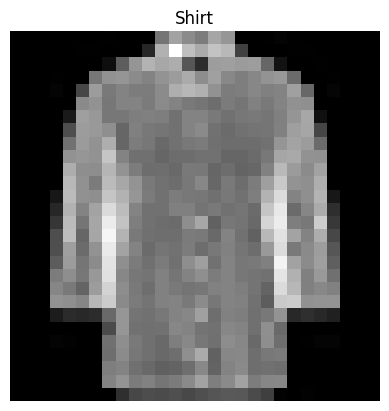

In [ ]:
# Show a sample
random_idx = torch.randint(0,len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.axis(False)

## 3. Model 0: Build a baseline model

A baseline model is a simple model you will try and improve upon with subsequent models/experiments.

In [ ]:
from torch import nn

# Create a flatten layer
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x)

# Print out what happened
print(f"Shape before flattening: {x.shape}")
print(f"Shape after flattening: {output.shape}")

Shape before flattening: torch.Size([1, 28, 28])
Shape after flattening: torch.Size([1, 784])


In [ ]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features=output_shape),
    )

  def forward(self, x):
    return self.layer_stack(x)

In [ ]:
torch.manual_seed(42)

# Setuo model with input paramters
model_0 = FashionMNISTModelV0(
    input_shape = 28*28,
    hidden_units = 10, # how many units in the hidden layer
    output_shape = len(class_names) # one for every class
).to('cpu')

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
dummy_x = torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [ ]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

### 3.1 Setup loss, optimizer and evaluation metrics

* Loss function - We'are working with multi-class data, our loss function will be `nn.CrossEntropyLoss()`.
* Optimizer - our optimizer `torch.optim.SGD()`
* Evualiation metric - Since we're working on a classifcation problm, let's use accuracy as our evaluation metric.

In [ ]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo
if Path("helper_functions.py").is_file():
  print('helper_functions.py already exists, skypping downloading')
else:
  print('Download helper_functions.py')
  request = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py')
  with open("helper_functions.py",'wb') as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skypping downloading


In [ ]:
# Import accuracy metric
from helper_functions import accuracy_fn

# Setup loss funciton and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr = 0.01)

### 3.2 Creating a function to time our experiments

Machine learning is very experimental.

Two of the main thing you'll often want to track are:
1. Model's performance (loss and accuracy values etc)
2. How fast it runs.

In [ ]:
from timeit import default_timer as timer
def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
  """Prints differences between start and end time."""
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

### 3.3 Creating a training loop and testing a model on batches of data

1. Loop through epochs.
2. Loop through training batches, perfom training steps, calculate the train loss *per batch*.
3. Loop through testing batches, perfom testing steps, calculate the test loss *per batch*.
4. Print out what's happening.
5. Time it all (for fun).

In [ ]:
# Import tqdm for progess bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs
epochs = 3

# Create training and test loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-----")
  ### Training
  train_loss = 0

  # Add a loop to loop through the training batches
  for batch, (X_train,y_train) in enumerate(train_dataloader):
    model_0.train()

    # 1.Forward pass
    y_pred = model_0(X_train)

    # 2. Calculate loss (per batch)
    loss = loss_fn(y_pred, y_train)
    train_loss += loss # accumulate train loss

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # Print out what's happening
    if batch % 400 ==0:
      print(f"Looked at {batch * len(X_train)}/{len(train_dataloader.dataset)} samples.")

  # Divide total train loss by length of train dataloader
  train_loss /= len(train_dataloader)

  ### Testing
  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      # 1. Forward pass
      test_pred = model_0(X_test)

      # 2. Calculate loss (accumulatively)
      test_loss += loss_fn(test_pred, y_test)

      # 3. Calcualte accuracy
      test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

    # Calculate the test loss average per batch
    test_loss /= len(test_dataloader)

    # Calculate the test acc average per batch
    test_acc /= len(test_dataloader)

  # Print out waht's happenin'
  print(f"\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f}, Test acc: {test_acc:.4f}")

# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.9096 | Test loss: 0.6295, Test acc: 78.6042
Epoch: 1
-----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.5571 | Test loss: 0.5501, Test acc: 80.8706
Epoch: 2
-----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.5023 | Test loss: 0.5139, Test acc: 82.3183
Train time on cpu: 46.786 seconds


## 4. Make predictions and get Model 0 results

In [ ]:
torch.manual_seed(42)
device = 'cuda' if torch.cuda.is_available() else 'cpu'
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device=device):
  """Return a dictionary containing the results of model predicting on data_loader."""
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X,y in data_loader:
      # Make our data device agnostic
      x, y = X.to(device), y.to(device)

      # Make predictions
      y_pred = model(X)

      # Accumulate the loss and acc values per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))

    # Scale loss and acc to find the average loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name":model.__class__.__name__, # only works when model was created with a class
          "model_loss": loss.item(),
          "model_acc": acc}

# Calcualte model 0 results on test dataset
model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.5130523443222046,
 'model_acc': 82.3582268370607}

## 5. Setup device agnostic-code (for using a GPU if there is one)

In [ ]:
# Setup device-agnostic code
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

## 6. Model 1: Building a better model with non-linearity



In [ ]:
# Create a model with non-liner and linear layers
from torch import nn
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_shape),
        nn.ReLU()
    )

  def forward(self, x: torch.Tensor):
    return self.layer_stack(x)

In [ ]:
# Create an instance of model_1
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape = 28*28,
                              hidden_units = 10,
                              output_shape = len(class_names)).to(device)
next(model_1.parameters()).device

device(type='cpu')

### 6.1 Setup loss, optimizer and evaluation metrics

In [ ]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)

### 6.2 Functionizing training and evaluation/testing loops

Let's create a function for:
* training loop - `train_step()`
* testing loop - `test_step()`

In [ ]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0, 0
    model.to(device)
    for batch, (X_train, y_train) in enumerate(data_loader):
        # Send data to GPU
        X_train, y_train = X_train.to(device), y_train.to(device)

        # 1. Forward pass
        y_pred = model(X_train)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y_train)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y_train,
                                 y_pred=y_pred.argmax(dim=1)) # Go from logits -> pred labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

In [ ]:
def test_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):

  """Perfoms a testing with model trying to learn on data_loader."""
  test_loss, test_acc = 0, 0

  # Put the model in eval mode
  model.eval()

  # Trun on inference mode context manager
  with torch.inference_mode():
    for X_test, y_test in data_loader:
      # Put data on target device
      X_test, y_test = X_test.to(device), y_test.to(device)

      # 1. Forward pass
      test_pred = model(X_test)

      # 2. Calculate loss (accumulatively)
      test_loss += loss_fn(test_pred, y_test)

      # 3. Calcualte accuracy
      test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

    # Calculate the test loss average per batch
    test_loss /= len(data_loader)

    # Calculate the test acc average per batch
    test_acc /= len(data_loader)

  # Print out waht's happenin'
  print(f"\nTest loss: {test_loss:.4f} | Test acc: {test_acc:.4f}")

In [ ]:
# Import tqdm for progess bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs
epochs = 3

# Create training and test loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-----")
  train_step(model=model_1,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)

  test_step(model=model_1,
             data_loader=test_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)

# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device=str(next(model_1.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----
Train loss: 0.93682 | Train accuracy: 66.79%

Test loss: 0.9606 | Test acc: 65.6250
Epoch: 1
-----
Train loss: 0.93682 | Train accuracy: 66.79%

Test loss: 0.9608 | Test acc: 65.5950
Epoch: 2
-----
Train loss: 0.93682 | Train accuracy: 66.79%

Test loss: 0.9603 | Test acc: 65.6250
Train time on cpu: 39.069 seconds


In [ ]:
# Get model_1 resilts dictionary
model_1_results = eval_model(model = model_1,
                             data_loader = test_dataloader,
                             loss_fn = loss_fn,
                             accuracy_fn = accuracy_fn,
                             device=device)
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.9603419899940491,
 'model_acc': 65.6349840255591}

## 7. Model 2: Building a Convulational Neural Network (CNN)
CNN's are also known ConvNets.

In [ ]:
from torch import nn
# Create a convulational neural network
class FashionMNISTModelV2(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    # Create a conv layer
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1), # values we can set ourselves in our NN's are called hyperparameters
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
        )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
        )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7, # There's a trick to calculating this
                  out_features=output_shape),
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    #print(f"Output shape of conv_block_1: {x.shape}")
    x = self.conv_block_2(x)
    #print(f"Output shape of conv_block_2: {x.shape}")
    x = self.classifier(x)
    #print(f"Output shape of classifier: {x.shape}")
    return x

In [ ]:
image.shape

torch.Size([1, 28, 28])

In [ ]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)

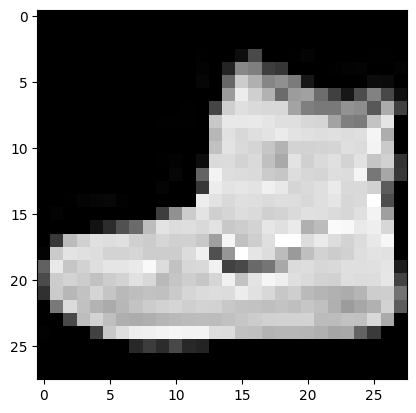

In [ ]:
plt.imshow(image.squeeze(),cmap='gray')

In [ ]:
rand_image_tensor = torch.rand(size=(1,28,28))
rand_image_tensor.shape

torch.Size([1, 28, 28])

In [ ]:
# Pass image through model
model_2(rand_image_tensor.unsqueeze(0).to(device))

tensor([[ 0.0372, -0.0748,  0.0573, -0.0396, -0.0098,  0.0194, -0.0003, -0.0114,
          0.0206,  0.0003]], grad_fn=<AddmmBackward0>)

In [ ]:
model_2.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[ 0.2548,  0.2767, -0.0781],
                        [ 0.3062, -0.0730,  0.0673],
                        [-0.1623,  0.1958,  0.2938]]],
              
              
                      [[[-0.2445,  0.2897,  0.0624],
                        [ 0.2463,  0.0451,  0.1607],
                        [-0.0471,  0.2570,  0.0493]]],
              
              
                      [[[-0.1556,  0.0850, -0.1536],
                        [-0.0391, -0.1354,  0.2211],
                        [-0.2631, -0.1537, -0.0941]]],
              
              
                      [[[-0.2004,  0.0315, -0.3292],
                        [ 0.3010, -0.2832,  0.2573],
                        [ 0.0555, -0.1082,  0.2060]]],
              
              
                      [[[ 0.0520,  0.2693,  0.0364],
                        [-0.1051,  0.0896, -0.0904],
                        [ 0.1403,  0.2976,  0.1927]]],
              
              
      

### 7.1 Stepping through `nn.Conv2d()`

In [ ]:
torch.manual_seed(42)

# Create a batch of images
images = torch.randn(size=(32,3,64,64))
test_image = images[0]

print(f"Image batch shape: {images.shape}")
print(f"Single image shape: {test_image.shape}")
print(f"Test image:\n {test_image}")

Image batch shape: torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
Test image:
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0

In [ ]:
torch.manual_seed(42)
# Create a single conv2d layer
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=(3,3),
                       stride=1,
                       padding=0)

# Pass the data through the convulational layer
conv_output = conv_layer(test_image)
conv_output.shape

torch.Size([10, 62, 62])

### 7.2 Stepping through `nn.MaxPool2d()`

In [ ]:
# Print out original image shape
print(f"Test image original shape: {test_image.shape}")
print(f"Test image with unsqueezed dimension: {test_image.unsqueeze(0).shape}")

# Create a sample nn.MaxPool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size=4)

# Pass data through just the conv_layer
test_image_through_conv = conv_layer(test_image)
print(f"Shape after going through conv_layer(): {test_image_through_conv.shape}")

# Pass data through just the MaxPool_layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through max_pool_layer(): {test_image_through_conv_and_max_pool.shape}")

Test image original shape: torch.Size([3, 64, 64])
Test image with unsqueezed dimension: torch.Size([1, 3, 64, 64])
Shape after going through conv_layer(): torch.Size([10, 62, 62])
Shape after going through max_pool_layer(): torch.Size([10, 15, 15])


In [ ]:
torch.manual_seed(42)
# Create a random tensor with a similar number of dimensions
random_tensor = torch.randn(size=(1,1,2,2))
print(f"\nRandom tensor:\n{random_tensor}")
print(f"Random tensor shape:{random_tensor.shape}")

# Create a max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass the random tensor through the max pool layer
max_pool_tensor = max_pool_layer(random_tensor)
print(f"\nMax pool tensor:\n {max_pool_tensor}")
print(f"Max pool tensor shape: {max_pool_tensor.shape}")


Random tensor:
tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Random tensor shape:torch.Size([1, 1, 2, 2])

Max pool tensor:
 tensor([[[[0.3367]]]])
Max pool tensor shape: torch.Size([1, 1, 1, 1])


### 7.3 Setup a loss function and optimizer for `model_2`

In [ ]:
# Setup loss function/eval metric/optimizer
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr = 0.01)

### 7.4 Training and testing `model_2` using our training and test functions.

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

from tqdm.auto import tqdm

# Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Train and test model
epochs = 3
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}:\n-----")
  train_step(model=model_2,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model_2,
             data_loader=test_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                            end=train_time_end_model_2,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0:
-----
Train loss: 1.03780 | Train accuracy: 62.35%

Test loss: 0.6254 | Test acc: 76.9069
Epoch: 1:
-----
Train loss: 0.54812 | Train accuracy: 80.10%

Test loss: 0.5237 | Test acc: 80.3814
Epoch: 2:
-----
Train loss: 0.45584 | Train accuracy: 83.61%

Test loss: 0.4555 | Test acc: 84.1753
Train time on cpu: 196.959 seconds


In [ ]:
# Get model results
model_2_results = eval_model(
    model=model_2,
    data_loader = test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.45480263233184814,
 'model_acc': 84.1952875399361}

## 8. Compare model results and training time

In [ ]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results,
                                model_1_results,
                                model_2_results])
compare_results

model_name  model_loss  model_acc
0  FashionMNISTModelV0    0.513052  82.358227
1  FashionMNISTModelV1    0.960342  65.634984
2  FashionMNISTModelV2    0.454803  84.195288

In [ ]:
# Add training time to results comparation
compare_results['training_time'] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]
compare_results

model_name  model_loss  model_acc  training_time
0  FashionMNISTModelV0    0.513052  82.358227      53.874021
1  FashionMNISTModelV1    0.960342  65.634984      39.069020
2  FashionMNISTModelV2    0.454803  84.195288     196.958632

Text(0, 0.5, 'model')

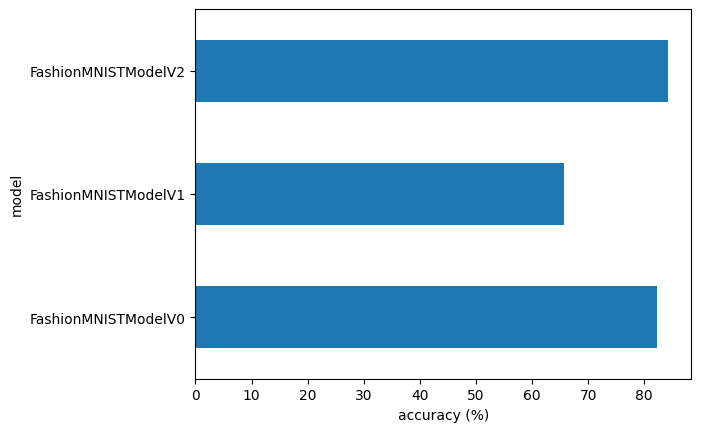

In [ ]:
# Visualize our model results
compare_results.set_index('model_name')['model_acc'].plot(kind='barh')
plt.xlabel("accuracy (%)")
plt.ylabel('model')

## 9. Make and evaluate random predictions with best model

In [ ]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # Prepare the sample (add a batch dimension and pass to target device)
      sample = torch.unsqueeze(sample, dim=0).to(device)

      # Forward pass (model output raw logits)
      pred_logits = model(sample)

      # Get prediction probability (logit -> prediction probability)
      pred_prob = torch.softmax(pred_logits.squeeze(), dim=0)

      # Get pred_prob off the GPU for further calculations
      pred_probs.append(pred_prob.cpu())

  # Stack the pred_prob to turn list into a tensor
  return torch.stack(pred_probs)

In [ ]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

# View the first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Sandal')

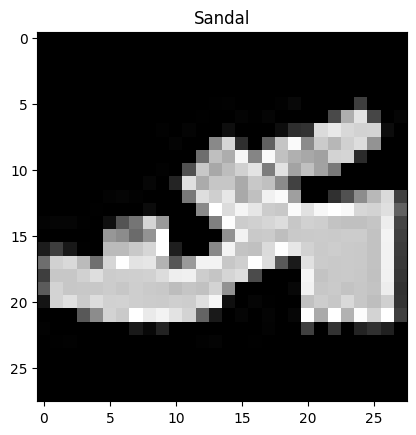

In [ ]:
plt.imshow(test_samples[0].squeeze(),cmap='gray')
plt.title(class_names[test_labels[0]])

In [ ]:
# Make predictions
pred_probs = make_predictions(model=model_2,
                              data=test_samples)

# View first two prediction probabilities
pred_probs[:2]

tensor([[8.3345e-08, 1.0874e-08, 7.1877e-08, 3.5598e-08, 3.8395e-09, 8.9352e-01,
         4.4428e-08, 2.1770e-04, 4.5894e-04, 1.0581e-01],
        [3.3754e-02, 8.2690e-01, 2.8716e-03, 1.2042e-01, 7.6572e-03, 1.1303e-05,
         7.2328e-03, 2.2900e-04, 9.0008e-04, 2.0878e-05]])

In [ ]:
# Convert prediction probabilities to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 1, 7, 2, 3, 0, 4, 7, 1])

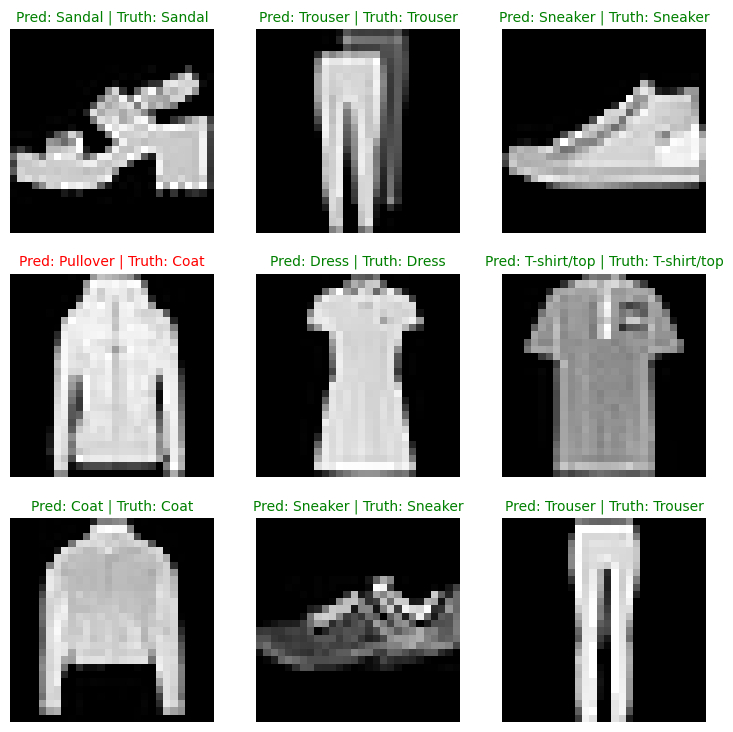

In [ ]:
# Plot predictions
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap='gray')

  # Find the target image
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text form)
  truth_label = class_names[test_labels[i]]

  # Create a tittle for the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality between pred an truth and change color of title text
  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c='g') # green text if prediction same as truth
  else:
    plt.title(title_text, fontsize=10, c='r')

  plt.axis(False)

## 10. Making a confusion matrix for further prediction evaluation

1. Make predictions with our trained model on the test dataset.
2. Make a confusion matrix `torchmetrics.ConfusionMatrix`.
3. Plot the confusion matrix using `mlxtend.plotting.plot_confusion_matrix()`.

In [ ]:
# Import tqdm.auto
from tqdm.auto import tqdm


# 1. Make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc='Making prediction ...'):
    # Send the data and targets to target device
    X, y = X.to(device), y.to(device)
    # Do the forward pass
    y_logits = model_2(X)
    # Turn predictions from logits -> prediction probabilities -> prediction labels
    y_pred = torch.softmax(y_logits.squeeze(),dim=0).argmax(dim=1)
    # Put prediction on CPU for evaluation
    y_preds.append(y_pred.cpu())

# Concatenate list of predictions into a tensor
#print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor[:10]

Making prediction ...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([3, 4, 1, 6, 7, 3, 0, 1, 2, 9])

In [ ]:
# 1. See if requiered packages are installed and if not, installed them ...
try:
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")
  assert int(mlxtend.__version__.split(".")[1]) >= 10, 'mlxtend version should be 0.19.0 or higher.'
except:
  !pip install -q torchmetrics
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 47.1 MB/s eta 0:00:00
mlxtend version: 0.22.0


In [ ]:
import mlxtend
mlxtend.__version__

'0.22.0'

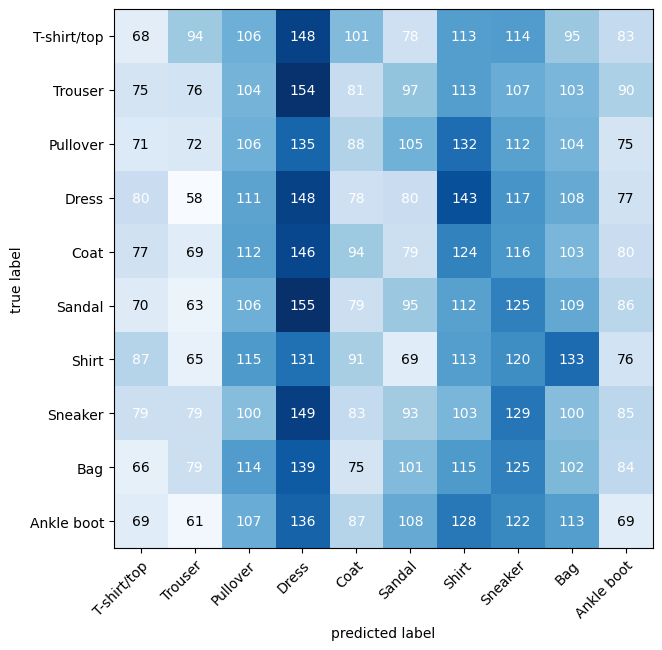

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(task="multiclass", num_classes=len(class_names))
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat = confmat_tensor.numpy(),
    class_names = class_names,
    figsize=(10,7)
)

## 11. Save and load best ferforming model

In [ ]:
# Saving our PyTorch model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = '03_pytorch_computer_visual_model_2.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/03_pytorch_computer_visual_model_2.pth


In [ ]:
# Create a new instance
torch.manual_seed(42)
loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                                hidden_units=10,
                                output_shape=len(class_names))

# Load in the save state_dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Send the model to the target device
loaded_model_2.to(device)

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
# Evaluate loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model=loaded_model_2,
    data_loader = test_dataloader,
    loss_fn = loss_fn,
    accuracy_fn= accuracy_fn,
    device = device
)
loaded_model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.45460548996925354,
 'model_acc': 84.21525559105432}

In [ ]:
# Check if model results are close to each other
torch.isclose(torch.tensor(model_2_results['model_loss']),
              torch.tensor(loaded_model_2_results['model_loss']),
              atol=1e-02)

tensor(True)

# 04 PyTorch Custom Datasets

## 0. Importing PyTorch and setting up device-agnostic code

In [ ]:
import torch
from torch import nn

torch.__version__

'2.3.0+cu121'

In [ ]:
# Setup device-agnostic code
device = "cuda" if torch.cuda.is_available() else 'cpu'
device

'cpu'

## 1. Get data

Our dataset is a subset of the Food101 dataset.

Food101 starts 101 different classes of food and 1000 images per classes (750 training, 250 testing).

Our dataset starts with 3 classes of food and only 10% of the images (~75 training, 25 testing).

In [ ]:
import requests
import zipfile
from pathlib import Path

# Setup path to a data folder
data_path = Path('data/')
image_path = data_path / "pizza_steak_sushi"

# If the iamge folder doesn't exist, download it and prepare it ...
if image_path.is_dir():
  print(f"{image_path} directory already exist ... skypping download")
else:
  print(f"{image_path} does not exist, creating one ...")
  image_path.mkdir(parents=True, exist_ok=True)

# Download pizza, steak, and sushi data
with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
  request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  print("Downloading pizza, steak, sushi data ....")
  f.write(request.content)

# Unzip pizza, steak, sushi data
with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip","r") as zip_ref:
  print("Unzipping pizza, steak, and sushi data ...")
  zip_ref.extractall(image_path)

data/pizza_steak_sushi does not exist, creating one ...
Unzipping pizza, steak, and sushi data ...


## 2. Becoming one with the data (data preparation and data exploration)

In [ ]:
import os
def walk_through_dir(dir_path):
  """Walks through dir_path returning its contents."""
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [ ]:
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test'.
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'.
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'.
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train'.
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'.
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'.
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'.


In [ ]:
# Setup train and testing paths
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

### 2.1 Visualizing and image

Let's write some code to:

1. Get all of the image paths
2. Pick a random image path using Python's `random.choice()`
3. Get the image class name using `pathlib.Path.parent.stem`.
4. Since we're working with images, let's open the image with Python's PIL.
5. We'll then show the image and print metadata.

Random image path_ data/pizza_steak_sushi/train/sushi/2797464.jpg
Image class: sushi
Image height: 512
Image width: 512


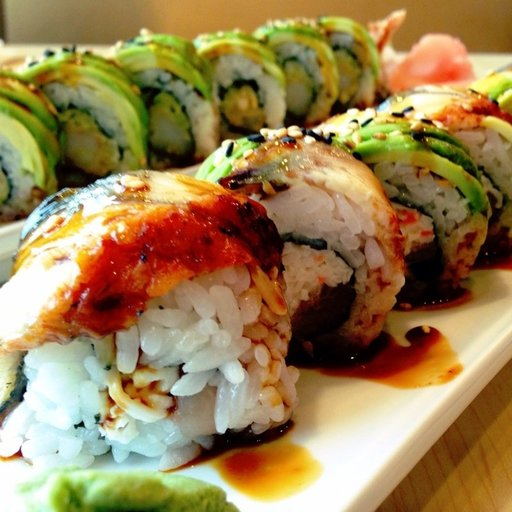

In [ ]:
import random
from PIL import Image

# Set seed
#random.seed(42)

# 1. Get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))

# 2. Pick a random image path
random_image_path = random.choice(image_path_list)

# 3. Get image class from path name (the iamge class is the name of the directory where the image is stored)
image_class = random_image_path.parent.stem

# 4. Open image
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image path_ {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

(-0.5, 511.5, 511.5, -0.5)

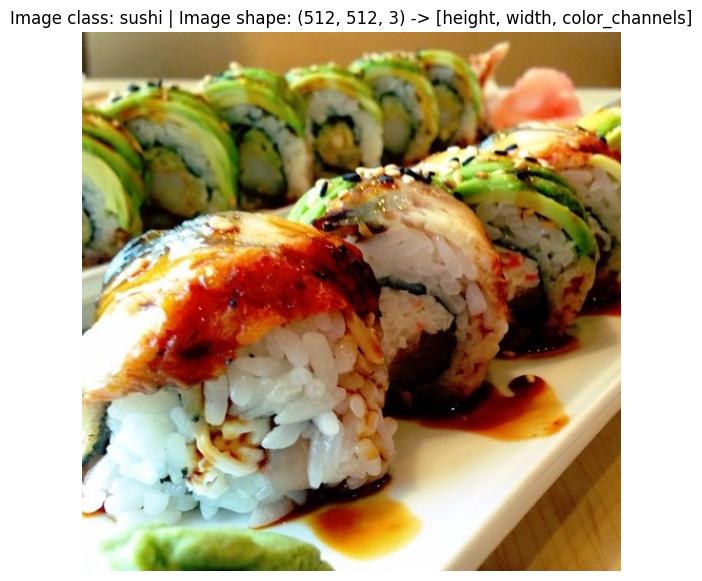

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Trun the image into an array
img_as_array = np.asarray(img)

# Plot the image with matplotlib
plt.figure(figsize=(10,7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False)

## 3. Tranforming data

Before we can use our image data with PyTorch:

1. Turn your target data into tensors (in our case, numerical representation of our images).
2. Turn it into a `torch.utils.data.Dataset` adn subsequently a `torch.utils.data.DataLoader`, we'll call theses `Dataset` and `DataLoader`.

In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets,transforms

### 3.1 Tranforming data with `torchvision.transforms`

In [ ]:
# Write a transform for image
data_transform = transforms.Compose([
    # Resize our images to 64x64
    transforms.Resize(size=(64,64)),
    # Flip the images randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5),
    # Turn the image into a torch.Tensor
    transforms.ToTensor()
])

In [ ]:
data_transform(img).shape

torch.Size([3, 64, 64])

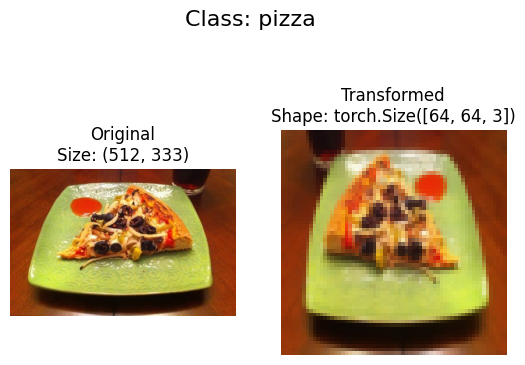

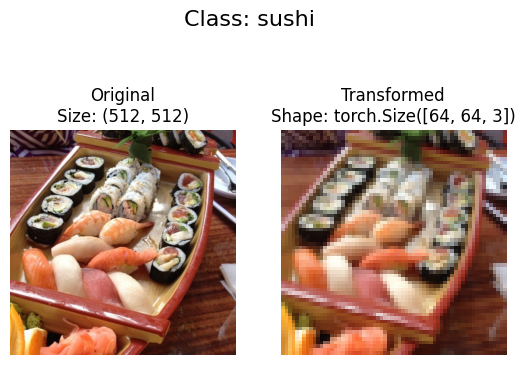

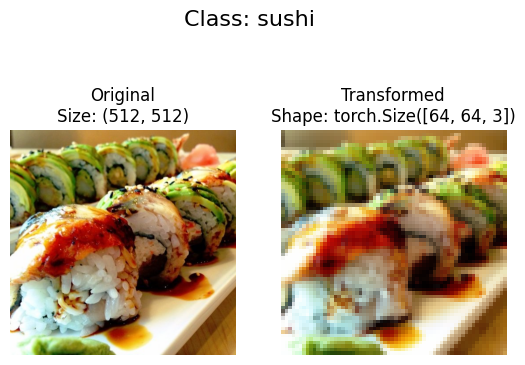

In [ ]:
def plot_transformed_images(image_paths, transform, n=3, seed=42):
  """
  Selects random images from a path of iamges and loads/transforms
  them then plots the original vs the transformed version.
  """
  if seed:
    random.seed(seed)
  random_image_paths = random.sample(image_paths, k=n)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots (nrows=1, ncols = 2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original\nSize: {f.size}")
      ax[0].axis('off')

      # Tranform and plot target image
      transformed_image = transform(f).permute(1,2,0) # We'll need to change shape to matplotlib (C,H.W) -> (H,W,C)
      ax[1].imshow(transformed_image)
      ax[1].set_title(f"Transformed\nShape: {transformed_image.shape}")
      ax[1].axis('off')

      fig.suptitle(f"Class: {image_path.parent.stem}",fontsize=16)

plot_transformed_images(image_paths=image_path_list,
                        transform=data_transform)

## 4. Option 1: Loading image data using `ImageFolder`

We can load image classification data using `torchvision.datasets.ImageFolder`.

In [ ]:
# Use ImageFolder to create dataset(s)
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform, # a transform for the data
                                  target_transform=None) # a transform for the label/target

test_data =  datasets.ImageFolder(root=test_dir,
                                  transform=data_transform)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [ ]:
# Get class names as list
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [ ]:
# Get class names as dict
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [ ]:
# Check the length of our datasets
len(train_data), len(test_data)

(225, 75)

In [ ]:
# Index on the train_data Dataset to get a single image and label
img, label = train_data[0][0], train_data[0][1]
print(f"Image tensor:\n {img}")
print(f"Image shape: {img.shape}")
print(f"image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")

Image tensor:
 tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
         [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
         [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
         ...,
         [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
         [0.0902, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],

        [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
         [0.0745, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
         [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
         ...,
         [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
         [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
         [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],

        [[0.0941, 0.0902, 0.0902,  ..., 0.0157, 0.0196, 0.0196],
         [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
         [0.0902, 0.0902, 0.0902,  ..., 0.0

Original shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Image permuted shape: torch.Size([64, 64, 3]) -> [height, width, color_channels]


Text(0.5, 1.0, 'pizza')

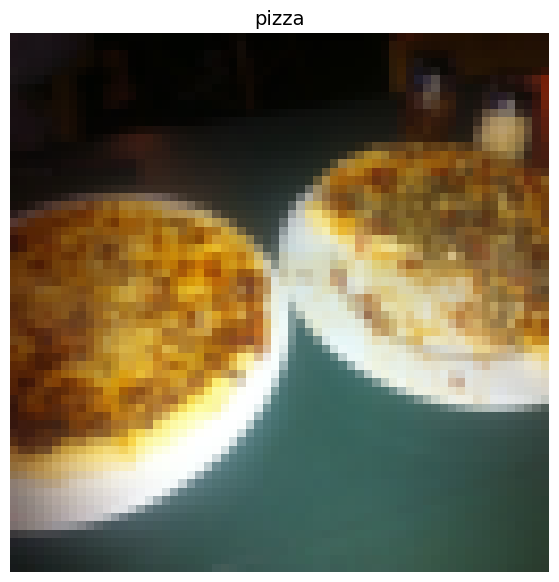

In [ ]:
# Rearrange the order dimensions
img_permute = img.permute(1,2,0)

# Print out different shapes
print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Image permuted shape: {img_permute.shape} -> [height, width, color_channels]")

# Plot the image
plt.figure(figsize=(10,7))
plt.imshow(img_permute)
plt.axis("off")
plt.title(class_names[label],fontsize=14)

### 4.1 Turn loaded images into `DataLoader`'s

In [ ]:
import os
os.cpu_count()

2

In [ ]:
# Turn train and test datasets into DataLoader's
from torch.utils.data import DataLoader
BATCH_SIZE = 32
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              num_workers=os.cpu_count(),
                              shuffle=True)
test_dataloader = DataLoader(dataset=test_data,
                              batch_size=BATCH_SIZE,
                              num_workers=os.cpu_count(),
                              shuffle=True)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x791049717bb0>,
 <torch.utils.data.dataloader.DataLoader at 0x7910497155a0>)

In [ ]:
img, label = next(iter(train_dataloader))

print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, widht]")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([32, 3, 64, 64]) -> [batch_size, color_channels, height, widht]
Label shape: torch.Size([32])


## 5 Option 2: Loading Image Data with a Custom `Dataset`

1. Want to be able to load images from file.
2. Want to be able to get class names from the Dataset.
3. Want to be able to get classes as dictionary from the Datasets.

In [ ]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

In [ ]:
# Instance of torchvision.datasets.ImageFolder()
train_data.classes, train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### 5.1 Creating a helper function to get class names

We want a function to:

1. Get the class names using `os.scandir()` to traverse a target directory (ideally the directory is in standard image classification format).
2. Raise an error if the class names aren't found.
3. Turn the class names into a dict and a list and return them.

In [ ]:
# Setup path for target directory
target_directory = train_dir
print(f"Target dir: {target_directory}")

# Get the class names from the target directory
class_names_found = sorted([entry.name for entry in list(os.scandir(target_directory))])
class_names_found

Target dir: data/pizza_steak_sushi/train


['pizza', 'steak', 'sushi']

In [ ]:
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
  """Finds the class folder names in a target directory."""
  # 1. Get the class names by scanning the target directory
  classes = sorted(entry.name for entry in list(os.scandir(directory)) if entry.is_dir())

  # 2. Raise an error if class names could not be found
  if not classes:
    raise FileNotFoundError(f"Couldn't find any classes in {directory} ... please check file structure.")

  # 3. Create a dictionary of index_labels
  class_to_idx = {class_name: i for i, class_name in enumerate(classes)}
  return classes, class_to_idx

In [ ]:
find_classes(target_directory)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### 5.2 Create a custom `Dataset` to replicate `ImageFOlder`

1. Subclass `torch.utils.data.Dataset`.
2. Initialize our subclass with a targ_dir parameter (the target data directory) and transform parameter (so we have the option to transform our data if needed).
3. Create several attributes for paths (the paths of our target images), transform (the transforms we might like to use, this can be None), classes and class_to_idx (from our `find_classes()` function).
4. Create a function to load images from file and return them, this could be using PIL or `torchvision.io` (for input/output of vision data).
5. Overwrite the `__len__` method of torch.utils.data.Dataset to return the number of samples in the Dataset, this is recommended but not required. This is so you can call len(Dataset).
6. Overwrite the `__getitem__` method of `torch.utils.data.Dataset` to return a single sample from the Dataset, this is required.

In [ ]:
# Write a custom dataset class (inherits from torch.utils.data.Dataset)
from torch.utils.data import Dataset

# 1. Subclass torch.utils.data.Dataset
class ImageFolderCustom(Dataset):

    # 2. Initialize with a targ_dir and transform (optional) parameter
    def __init__(self, targ_dir: str, transform=None) -> None:

        # 3. Create class attributes
        # Get all image paths
        self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg")) # note: you'd have to update this if you've got .png's or .jpeg's
        # Setup transforms
        self.transform = transform
        # Create classes and class_to_idx attributes
        self.classes, self.class_to_idx = find_classes(targ_dir)

    # 4. Make function to load images
    def load_image(self, index: int) -> Image.Image:
        "Opens an image via a path and returns it."
        image_path = self.paths[index]
        return Image.open(image_path)

    # 5. Overwrite the __len__() method (optional but recommended for subclasses of torch.utils.data.Dataset)
    def __len__(self) -> int:
        "Returns the total number of samples."
        return len(self.paths)

    # 6. Overwrite the __getitem__() method (required for subclasses of torch.utils.data.Dataset)
    def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
        "Returns one sample of data, data and label (X, y)."
        img = self.load_image(index)
        class_name  = self.paths[index].parent.name # expects path in data_folder/class_name/image.jpeg
        class_idx = self.class_to_idx[class_name]

        # Transform if necessary
        if self.transform:
            return self.transform(img), class_idx # return data, label (X, y)
        else:
            return img, class_idx # return data, label (X, y)

In [ ]:
# Augment train data
from torchvision import transforms
train_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

# Don't augment test data, only reshape
test_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

In [ ]:
# Test out ImageFolderCustom
train_data_custom = ImageFolderCustom(targ_dir=train_dir,
                                      transform=train_transforms)
test_data_custom = ImageFolderCustom(targ_dir=test_dir,
                                     transform=test_transforms)
train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x791049717a90>,
 <__main__.ImageFolderCustom at 0x791049716770>)

In [ ]:
train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [ ]:
# Check for equality amongst our custom Dataset and ImageFolder Dataset
print((len(train_data_custom) == len(train_data)) & (len(test_data_custom) == len(test_data)))
print(train_data_custom.classes == train_data.classes)
print(train_data_custom.class_to_idx == train_data.class_to_idx)

True
True
True


### 5.3 Create a function to display random images

1. Take in a `Dataset` and a number of other parameters such as classes (the names of our target classes), the number of images to display (`n`) and a random seed.
2. To prevent the display getting out of hand, we'll cap `n` at 10 images.
3. Set the random seed for reproducible plots (if `seed` is set).
4. Get a list of random sample indexes (we can use Python's `random.sample()` for this) to plot.
5. Setup a `matplotlib` plot.
6. Loop through the random sample indexes found in step 4 and plot them with `matplotlib`.
7. Make sure the sample images are of shape `HWC` (height, width, color channels) so we can plot them.

In [ ]:
# 1. Take in a Dataset as well as a list of class names
def display_random_images(dataset: torch.utils.data.dataset.Dataset,
                          classes: List[str] = None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):

    # 2. Adjust display if n too high
    if n > 10:
        n = 10
        display_shape = False
        print(f"For display purposes, n shouldn't be larger than 10, setting to 10 and removing shape display.")

    # 3. Set random seed
    if seed:
        random.seed(seed)

    # 4. Get random sample indexes
    random_samples_idx = random.sample(range(len(dataset)), k=n)

    # 5. Setup plot
    plt.figure(figsize=(16, 8))

    # 6. Loop through samples and display random samples
    for i, targ_sample in enumerate(random_samples_idx):
        targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

        # 7. Adjust image tensor shape for plotting: [color_channels, height, width] -> [color_channels, height, width]
        targ_image_adjust = targ_image.permute(1, 2, 0)

        # Plot adjusted samples
        plt.subplot(1, n, i+1)
        plt.imshow(targ_image_adjust)
        plt.axis("off")
        if classes:
            title = f"class: {classes[targ_label]}"
            if display_shape:
                title = title + f"\nshape: {targ_image_adjust.shape}"
        plt.title(title)

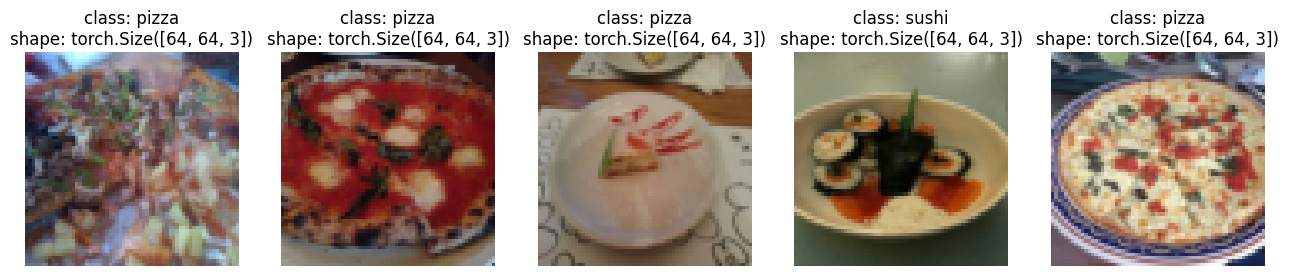

In [ ]:
# Display random images from ImageFolder created Dataset
display_random_images(train_data,
                      n=5,
                      classes=class_names,
                      seed=None)

For display purposes, n shouldn't be larger than 10, setting to 10 and removing shape display.


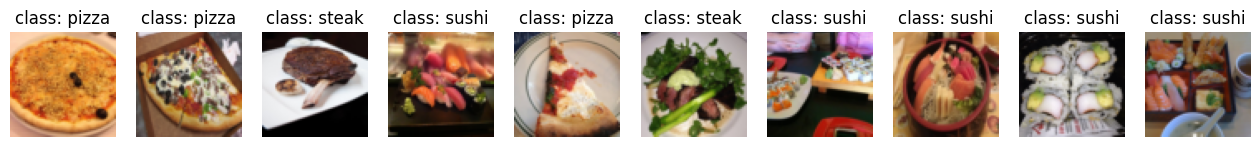

In [ ]:
# Display random images from ImageFolderCustom Dataset
display_random_images(train_data_custom,
                      n=12,
                      classes=class_names,
                      seed=None) # Try setting the seed for reproducible images

### 5.4 Turn custom loaded images into `DataLoader`'s

In [ ]:
# Turn train and test custom Dataset's into DataLoader's
from torch.utils.data import DataLoader
train_dataloader_custom = DataLoader(dataset=train_data_custom, # use custom created train Dataset
                                     batch_size=1, # how many samples per batch?
                                     num_workers=0, # how many subprocesses to use for data loading? (higher = more)
                                     shuffle=True) # shuffle the data?

test_dataloader_custom = DataLoader(dataset=test_data_custom, # use custom created test Dataset
                                    batch_size=1,
                                    num_workers=0,
                                    shuffle=False) # don't usually need to shuffle testing data

train_dataloader_custom, test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x791057788df0>,
 <torch.utils.data.dataloader.DataLoader at 0x7910577890c0>)

In [ ]:
# Get image and label from custom DataLoader
img_custom, label_custom = next(iter(train_dataloader_custom))

# Batch size will now be 1, try changing the batch_size parameter above and see what happens
print(f"Image shape: {img_custom.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label_custom.shape}")

Image shape: torch.Size([1, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([1])


## 6 Other forms of transforms (data augmentation)

Data augmentation is the process of altering your data in such a way that you artificially increase the diversity of your training set.

In [ ]:
# Let's look at trivailaugment
from torchvision import transforms

train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31), # how intense
    transforms.ToTensor() # use ToTensor() last to get everything between 0 & 1
])

# Don't need to perform augmentation on the test data
test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

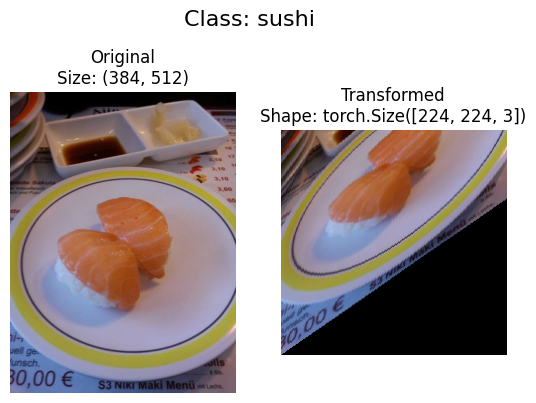

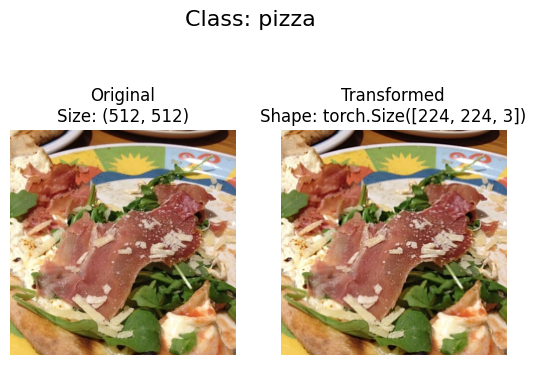

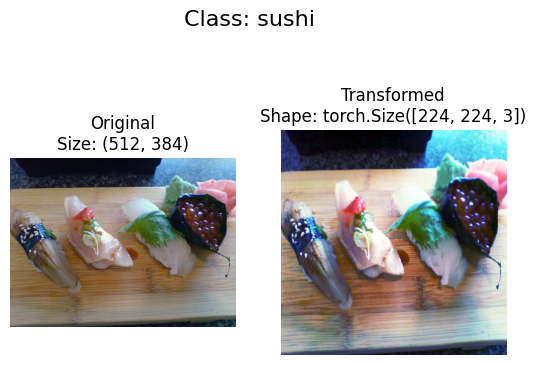

In [ ]:
# Get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))

# Plot random images
plot_transformed_images(
    image_paths=image_path_list,
    transform=train_transforms,
    n=3,
    seed=None
)

## 7 Model 0: TinyVGG without data augmentation

Let's replicate TinyVGG architecture

### 7.1 Creaing transforms and loading data for Model 0

In [ ]:
# Create simple transform
simple_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
])

In [ ]:
# 1. Load and transform data
from torchvision import datasets
train_data_simple = datasets.ImageFolder(root=train_dir, transform=simple_transform)
test_data_simple = datasets.ImageFolder(root=test_dir, transform=simple_transform)

# 2. Turn data into DataLoaders
import os
from torch.utils.data import DataLoader

# Setup batch size and number of workers
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()
print(f"Creating DataLoader's with batch size {BATCH_SIZE} and {NUM_WORKERS} workers.")

# Create DataLoader's
train_dataloader_simple = DataLoader(train_data_simple,
                                     batch_size=BATCH_SIZE,
                                     shuffle=True,
                                     num_workers=NUM_WORKERS)

test_dataloader_simple = DataLoader(test_data_simple,
                                    batch_size=BATCH_SIZE,
                                    shuffle=False,
                                    num_workers=NUM_WORKERS)

train_dataloader_simple, test_dataloader_simple

Creating DataLoader's with batch size 32 and 2 workers.


(<torch.utils.data.dataloader.DataLoader at 0x7910490fd120>,
 <torch.utils.data.dataloader.DataLoader at 0x7910575bd870>)

In [ ]:
class TinyVGG(nn.Module):
    """
    Model architecture copying TinyVGG from:
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1), # options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from?
            # It's because each layer of our network compresses and changes the shape of our inputs data.
            nn.Linear(in_features=hidden_units*16*16,
                      out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
        x = self.conv_block_1(x)
        # print(x.shape)
        x = self.conv_block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x
        # return self.classifier(self.conv_block_2(self.conv_block_1(x))) # <- leverage the benefits of operator fusion

torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3, # number of color channels (3 for RGB)
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

### 7.3 Try a forward pass on a single image (to test the model)

In [ ]:
# 1. Get a batch of images and labels from the DataLoader
img_batch, label_batch = next(iter(train_dataloader_simple))

# 2. Get a single image from the batch and unsqueeze the image so its shape fits the model
img_single, label_single = img_batch[0].unsqueeze(dim=0), label_batch[0]
print(f"Single image shape: {img_single.shape}\n")

# 3. Perform a forward pass on a single image
model_0.eval()
with torch.inference_mode():
    pred = model_0(img_single.to(device))

# 4. Print out what's happening and convert model logits -> pred probs -> pred label
print(f"Output logits:\n{pred}\n")
print(f"Output prediction probabilities:\n{torch.softmax(pred, dim=1)}\n")
print(f"Output prediction label:\n{torch.argmax(torch.softmax(pred, dim=1), dim=1)}\n")
print(f"Actual label:\n{label_single}")

Single image shape: torch.Size([1, 3, 64, 64])

Output logits:
tensor([[0.0578, 0.0634, 0.0351]])

Output prediction probabilities:
tensor([[0.3352, 0.3371, 0.3277]])

Output prediction label:
tensor([1])

Actual label:
2


### 7.4 Use `torchinfo` to gen an idea of the shapes going through our model

In [ ]:
# Install torchinfo if it's not available, import it if it is
try:
    import torchinfo
except:
    !pip install torchinfo
    import torchinfo

from torchinfo import summary
summary(model_0, input_size=[1, 3, 64, 64]) # do a test pass through of an example input size

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 32, 32]           --
│    └─Conv2d: 2-1                       [1, 10, 64, 64]           280
│    └─ReLU: 2-2                         [1, 10, 64, 64]           --
│    └─Conv2d: 2-3                       [1, 10, 64, 64]           910
│    └─ReLU: 2-4                         [1, 10, 64, 64]           --
│    └─MaxPool2d: 2-5                    [1, 10, 32, 32]           --
├─Sequential: 1-2                        [1, 10, 16, 16]           --
│    └─Conv2d: 2-6                       [1, 10, 32, 32]           910
│    └─ReLU: 2-7                         [1, 10, 32, 32]           --
│    └─Conv2d: 2-8                       [1, 10, 32, 32]           910
│    └─ReLU: 2-9                         [1, 10, 32, 32]           --
│    └─MaxPool2d: 2-10                   [1, 10, 16, 16]           --
├─Sequentia

### 7.5 Create train and test loop functions

In [ ]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):
    # Put model in train mode
    model.train()

    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0

    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metric across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

In [ ]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):
    # Put model in eval mode
    model.eval()

    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0

    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

    # Adjust metrics to get average loss and accuracy per batch
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

### 7.6 Creating a `train()` function to combine `train_step()` and `test_step()`

In [ ]:
from tqdm.auto import tqdm

# 1. Take in various parameters required for training and test steps
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):

    # 2. Create empty results dictionary
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }

    # 3. Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        test_loss, test_acc = test_step(model=model,
            dataloader=test_dataloader,
            loss_fn=loss_fn)

        # 4. Print out what's happening
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        # 5. Update results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    # 6. Return the filled results at the end of the epochs
    return results

### 7.7 Train and evaluate model 0

In [ ]:
# Set random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 5

# Recreate an instance of TinyVGG
model_0 = TinyVGG(input_shape=3, # number of color channels (3 for RGB)
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader_simple,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1078 | train_acc: 0.2578 | test_loss: 1.1362 | test_acc: 0.2604
Epoch: 2 | train_loss: 1.0846 | train_acc: 0.4258 | test_loss: 1.1622 | test_acc: 0.1979
Epoch: 3 | train_loss: 1.1153 | train_acc: 0.2930 | test_loss: 1.1695 | test_acc: 0.1979
Epoch: 4 | train_loss: 1.0990 | train_acc: 0.2891 | test_loss: 1.1343 | test_acc: 0.1979
Epoch: 5 | train_loss: 1.0990 | train_acc: 0.2930 | test_loss: 1.1434 | test_acc: 0.1979
Total training time: 14.698 seconds


### 7.8 Plot the loss curves of model 0

A **loss curve** is a way of tracking your model's progress over time.


In [ ]:
# Get the model_0_results keys
model_0_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

In [ ]:
def plot_loss_curves(results: Dict[str, List[float]]):
    """Plots training curves of a results dictionary.

    Args:
        results (dict): dictionary containing list of values, e.g.
            {"train_loss": [...],
             "train_acc": [...],
             "test_loss": [...],
             "test_acc": [...]}
    """

    # Get the loss values of the results dictionary (training and test)
    loss = results['train_loss']
    test_loss = results['test_loss']

    # Get the accuracy values of the results dictionary (training and test)
    accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    # Figure out how many epochs there were
    epochs = range(len(results['train_loss']))

    # Setup a plot
    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

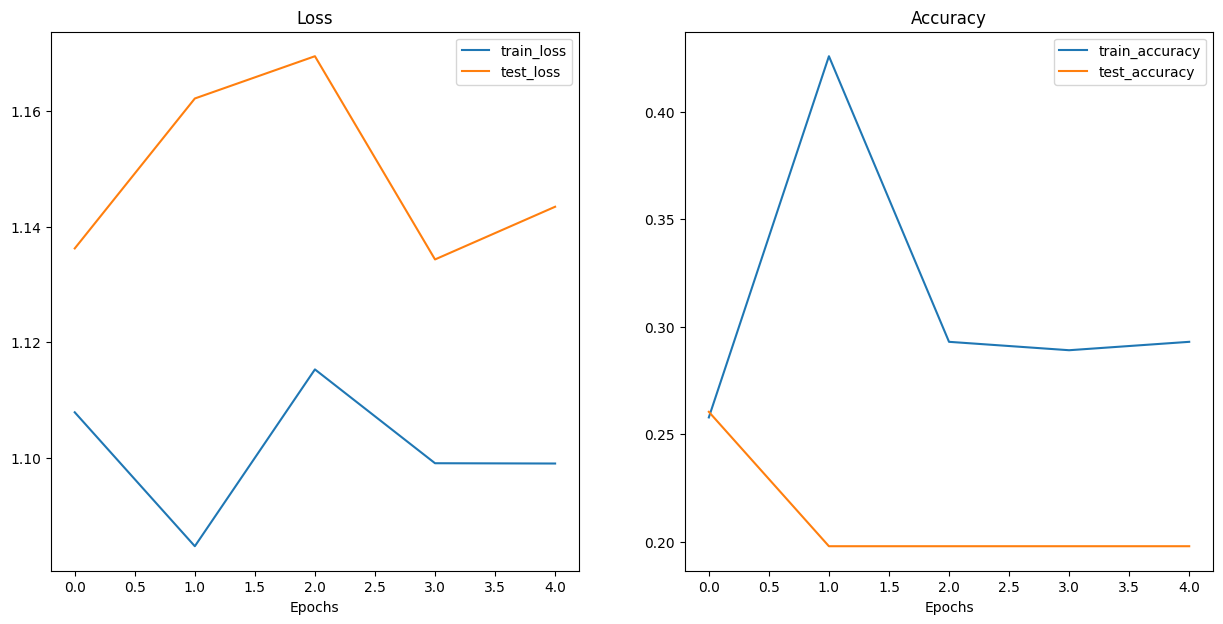

In [ ]:
plot_loss_curves(model_0_results)

## 9 Model 1: TinyVGG with Data Augmentation

### 9.1 Create transform with data augmentation

In [ ]:
# Create training transform with TrivialAugment
train_transform_trivial_augment = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

# Create testing transform (no data augmentation)
test_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

### 9.2 Create train and test `Dataset`'s and `DataLoader`'s

In [ ]:
# Turn image folders into Datasets
train_data_augmented = datasets.ImageFolder(train_dir, transform=train_transform_trivial_augment)
test_data_simple = datasets.ImageFolder(test_dir, transform=test_transform)

train_data_augmented, test_data_simple

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
            ))

In [ ]:
# Turn Datasets into DataLoader's
import os
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

torch.manual_seed(42)
train_dataloader_augmented = DataLoader(train_data_augmented,
                                        batch_size=BATCH_SIZE,
                                        shuffle=True,
                                        num_workers=NUM_WORKERS)

test_dataloader_simple = DataLoader(test_data_simple,
                                    batch_size=BATCH_SIZE,
                                    shuffle=False,
                                    num_workers=NUM_WORKERS)

train_dataloader_augmented, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x791057983b50>,
 <torch.utils.data.dataloader.DataLoader at 0x7910497155a0>)

### 9.3 Construc and train Model 1

In [ ]:
# Create model_1 and send it to the target device
torch.manual_seed(42)
model_1 = TinyVGG(
    input_shape=3,
    hidden_units=10,
    output_shape=len(train_data_augmented.classes)).to(device)
model_1

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [ ]:
# Set random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 5

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_1
model_1_results = train(model=model_1,
                        train_dataloader=train_dataloader_augmented,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1076 | train_acc: 0.2500 | test_loss: 1.1062 | test_acc: 0.2604
Epoch: 2 | train_loss: 1.0791 | train_acc: 0.4258 | test_loss: 1.1387 | test_acc: 0.2604
Epoch: 3 | train_loss: 1.0810 | train_acc: 0.4258 | test_loss: 1.1696 | test_acc: 0.2604
Epoch: 4 | train_loss: 1.1292 | train_acc: 0.3047 | test_loss: 1.1625 | test_acc: 0.2604
Epoch: 5 | train_loss: 1.0899 | train_acc: 0.4258 | test_loss: 1.1482 | test_acc: 0.2604
Total training time: 16.911 seconds


### 9.4 Plot the loss curves of Model 1

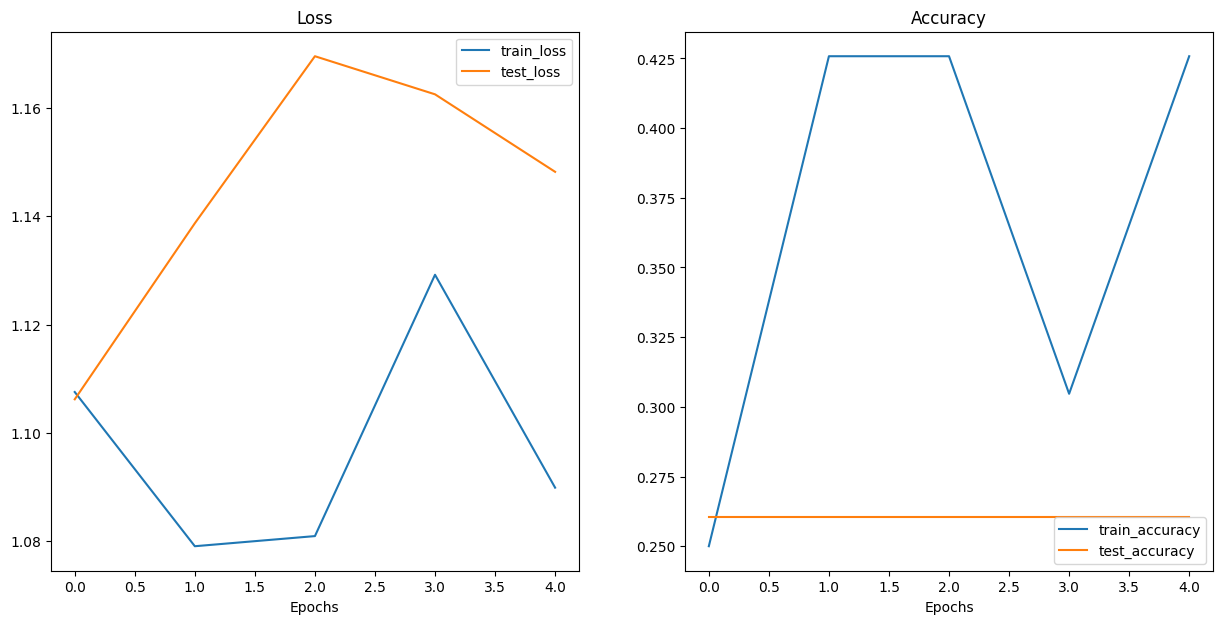

In [ ]:
plot_loss_curves(model_1_results)

## 10. Compare model results

In [ ]:
import pandas as pd
model_0_df = pd.DataFrame(model_0_results)
model_1_df = pd.DataFrame(model_1_results)
model_0_df

train_loss  train_acc  test_loss  test_acc
0    1.107836   0.257812   1.136208  0.260417
1    1.084645   0.425781   1.162171  0.197917
2    1.115261   0.292969   1.169489  0.197917
3    1.099015   0.289062   1.134302  0.197917
4    1.098965   0.292969   1.143424  0.197917

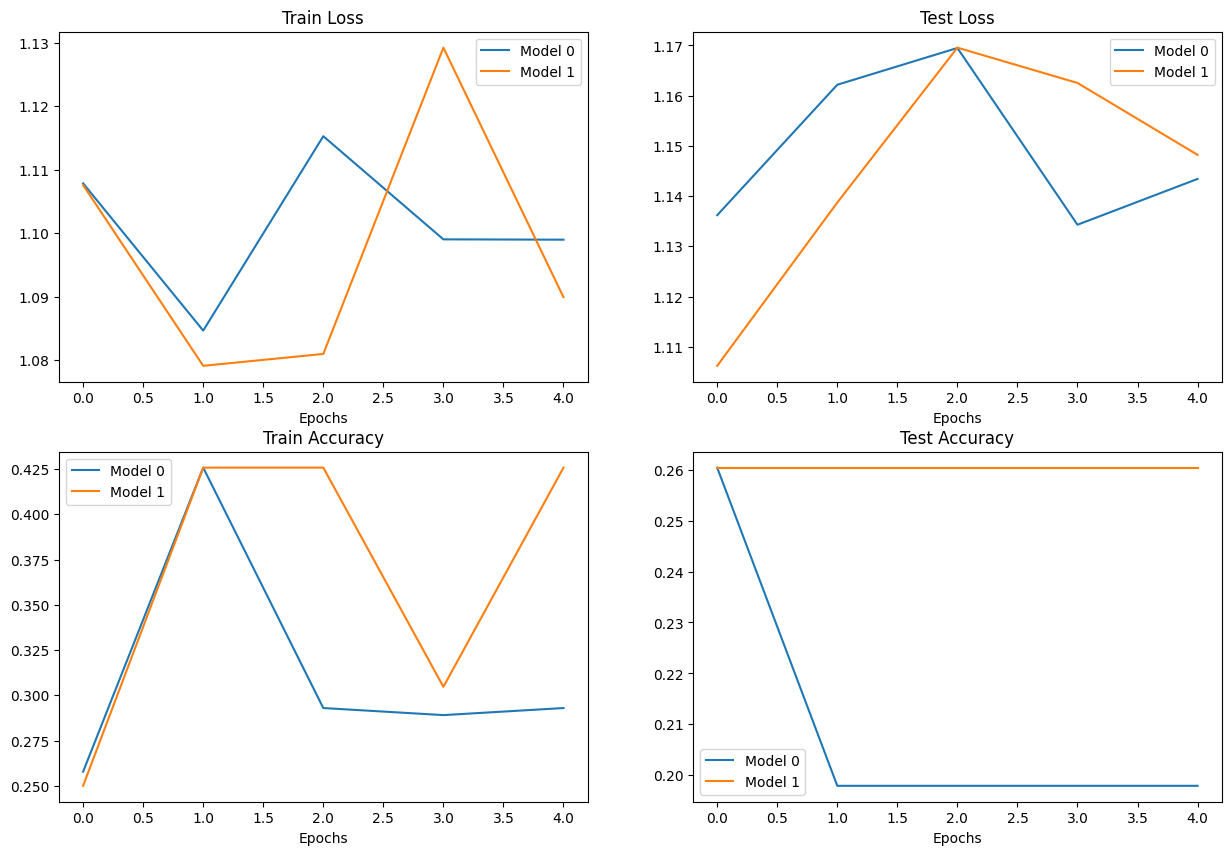

In [ ]:
# Setup a plot
plt.figure(figsize=(15, 10))

# Get number of epochs
epochs = range(len(model_0_df))

# Plot train loss
plt.subplot(2, 2, 1)
plt.plot(epochs, model_0_df["train_loss"], label="Model 0")
plt.plot(epochs, model_1_df["train_loss"], label="Model 1")
plt.title("Train Loss")
plt.xlabel("Epochs")
plt.legend()

# Plot test loss
plt.subplot(2, 2, 2)
plt.plot(epochs, model_0_df["test_loss"], label="Model 0")
plt.plot(epochs, model_1_df["test_loss"], label="Model 1")
plt.title("Test Loss")
plt.xlabel("Epochs")
plt.legend()

# Plot train accuracy
plt.subplot(2, 2, 3)
plt.plot(epochs, model_0_df["train_acc"], label="Model 0")
plt.plot(epochs, model_1_df["train_acc"], label="Model 1")
plt.title("Train Accuracy")
plt.xlabel("Epochs")
plt.legend()

# Plot test accuracy
plt.subplot(2, 2, 4)
plt.plot(epochs, model_0_df["test_acc"], label="Model 0")
plt.plot(epochs, model_1_df["test_acc"], label="Model 1")
plt.title("Test Accuracy")
plt.xlabel("Epochs")
plt.legend();